In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

from scipy.cluster.hierarchy import dendrogram

In [ ]:
file_path = 'pokemon.csv'
df = pd.read_csv(file_path, index_col=False, low_memory=False,)

# EDA

In [ ]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


(   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
 0  1              Bulbasaur  Grass  Poison    318  45      49       49   
 1  2                Ivysaur  Grass  Poison    405  60      62       63   
 2  3               Venusaur  Grass  Poison    525  80      82       83   
 3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
 4  4             Charmander   Fire     NaN    309  39      52       43   
 
    Sp. Atk  Sp. Def  Speed  Generation  Legendary  
 0       65       65     45           1      False  
 1       80       80     60           1      False  
 2      100      100     80           1      False  
 3      122      120     80           1      False  
 4       60       50     65           1      False  ,
 None)

## Základní popis
Dataset obsahuje 13 atributů o 800 Pokémonech.


In [ ]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Počet záznamů (Count)
Pro každý atribut je k dispozici 800 hodnot, což znamená, že dataset obsahuje informace o 800 Pokémonech.

### Průměrné hodnoty (Mean):
Celková síla Pokémonů je v průměru 362.81.
Průměrné HP (životy) je 69.26, útok 79.00, obrana 73.84, speciální útok 72.82, speciální obrana 71.90 a rychlost 68.28.
Průměrná generace je 3.32, což naznačuje, že většina Pokémonů pochází z prvních tří generací.

### Rozptyl hodnot (Směrodatná odchylka - Std):
Největší rozptyl je vidět u celkové statistiky (208.34), což značí, že výkon Pokémonů se výrazně liší.
Ostatní vlastnosti, jako útok a obrana, mají menší rozptyl, což naznačuje, že jejich hodnoty jsou v datasetu konzistentnější.

### Minimální hodnoty (Min):
Pokémon s nejnižším celkovým skóre má hodnotu 180.
Nejnižší hodnota HP je 1, rychlosti 5, což značí slabé Pokémony v těchto kategoriích.

### Kvartily (25%, 50%, 75%):
25 % Pokémonů má celkové statistiky pod 330, což značí spíše slabší Pokémony.
Medián celkových statistik je 450, což ukazuje na rovnoměrné rozložení silných a slabších Pokémonů.
75 % Pokémonů má celkové statistiky pod 515, takže pouze 25 % Pokémonů je výrazně silnějších.

### Maximální hodnoty (Max):
Nejlepší Pokémon má celkovou hodnotu 780.
Rychlost, útok a speciální útok dosahují maximálně 230, což odpovídá nejsilnějším Pokémonům v těchto kategoriích.

### Shrnutí:
Tabulka ukazuje velkou variabilitu v silách Pokémonů. Většina Pokémonů má průměrné statistiky kolem 362.81 bodů, ale mezi nimi jsou i výrazně slabší a silnější Pokémoni. Největší rozdíly jsou patrné v celkových statistikách, rychlosti a speciálním útoku.

## Druhy pokémonů
Obsahuje 18 různých typů Pokémonů. Každý pokémon má alespoň jeden typ, nektěří Pokémonové mají i 2. typ, který upřesňuje jeho vlastnosti. Například pokud 1. typ je "Dragon", 2. typ může být například "Dark" nebo "Fire". Pokud 2. typ nemá, je u pokémona záznam "nan"

In [ ]:
df['Type 1'].unique()
# len(df['Type 1'].unique()) = 18

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
df['Type 2'].unique()
# len(df['Type 2'].unique()) = 19

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

## Kontrola chybějících hodnot

Zde můžeme vidět, že 386 pokémonů nemá druhý typ.

In [ ]:
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


## Kontrola zduplikovaných hodnot

Žádný Pokémon se zde nevyskytuje vícekrát.

In [ ]:
df.duplicated().sum()

0

## Datové typy

In [ ]:
df.dtypes

,0
#,int64
Name,object
Type 1,object
Type 2,object
Total,int64
HP,int64
Attack,int64
Defense,int64
Sp. Atk,int64
Sp. Def,int64


|Atribut|	Datový typ|Popis|
| --------      | -------    |-------        |
| hashtag| int64 | Unikátní ID každého Pokémona |
|Name|	object |Jméno každého Pokémona|
|Type 1|	object|Hlavní typ Pokémona, který určuje jeho |slabosti/odolnosti vůči útokům|
|Type 2| object |	Druhý typ (pokud má Pokémon dvojí typ)|
| Total	| int64 |Součet všech statistik uvedených níže, obecný ukazatel síly Pokémona|
| HP	| int64|Počet životů (hit points), určuje, kolik poškození Pokémon snese, než omdlí|
|Attack	|int64|Základní hodnota pro běžné útoky (např. Škrábnutí, Úder)
|Defense	|int64|Základní odolnost proti běžným útokům
|SP Atk|int64	|Speciální útok, základní hodnota pro speciální útoky (např. Ohnivý výbuch, Vodní dělo)
|SP Def	|int64|Základní odolnost proti speciálním útokům
|Speed	|int64|Rychlost, určuje, který Pokémon zaútočí první v každém kole
| Generation |int64| Generace, ve které byl Pokémon představen (např. 1 = první generace, 2 = druhá generace)|
| Legendary | bool | určuje, zda je Pokémon legendární (vzácný)


## Zjištění unikátních hodnot

V datasetu se vyskytují pokémoni z 6 generací, z nichž 65 je legendárních.

Zajímavostí je, že počet ID neodpovídá počtu názvů Pokémonů. To je způsobeno tím, že někteří pokémoni mají například různé velikosti (viz. tabulka). Pro shlukování jsou atributy jméno a ID irelevantní a budou v pre-processingu smazány.

| ID  | Name                     | Type 1 | Type 2 | Total | HP | Attack | Defense | Sp. Atk | Sp. Def | Speed | Generation | Legendary |
|-----|--------------------------|--------|--------|-------|----|--------|---------|---------|---------|-------|------------|-----------|
| 710 | PumpkabooAverage Size    | Ghost  | Grass  | 335   | 49 | 66     | 70      | 44      | 55      | 51    | 6          | False     |
| 710 | PumpkabooSmall Size      | Ghost  | Grass  | 335   | 44 | 66     | 70      | 44      | 55      | 56    | 6          | False     |
| 710 | PumpkabooLarge Size      | Ghost  | Grass  | 335   | 54 | 66     | 70      | 44      | 55      | 46    | 6          | False     |
| 710 | PumpkabooSuper Size      | Ghost  | Grass  | 335   | 59 | 66     | 70      | 44      | 55      | 41    | 6          | False     |


In [ ]:
df.nunique()

,0
#,721
Name,800
Type 1,18
Type 2,18
Total,200
HP,94
Attack,111
Defense,103
Sp. Atk,105
Sp. Def,92


## Legendární Pokémoni

Zajímavým atributem, který pro mě osobně na první pohled vyčnívá je atribut 'Legendary'.

In [ ]:
legendary_pokemons = df[df['Legendary'] == True]
legendary_pokemons

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
alt.Chart(legendary_pokemons).mark_circle().encode(
    x='Total',
    y='HP',
    color='Type 1',
    tooltip=['Name', 'Type 1', 'Type 2', 'Total', 'HP']
).interactive()

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

Výše uvedená grafická reprezentace ukazuje poměr životů (HP) a celkové síly Pokémona (Total). Lze

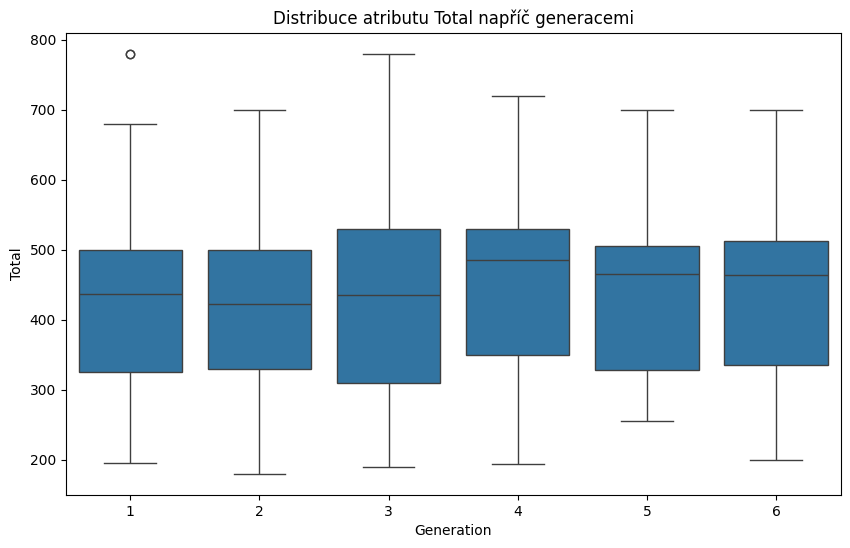

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Generation', y='Total', data=df)
plt.xlabel('Generation')
plt.ylabel('Total')
_ = plt.title('Distribuce atributu Total napříč generacemi')

Z krabicových grafů můžeme pozorovat celkem rovnoměrné rozdělení Pokémonů do generací.
Lze zde pozorovat hned 3 zajímavosti:

1) Outlier v první generaci (Pokémon, který spadá do první generace a je velmi silný).

2) 3. generace má velký rozsah celkové síly Pokémonů.

3) Mediány pro 4,5 a 6 generaci jsou podobné.

## Popis numerických atributů

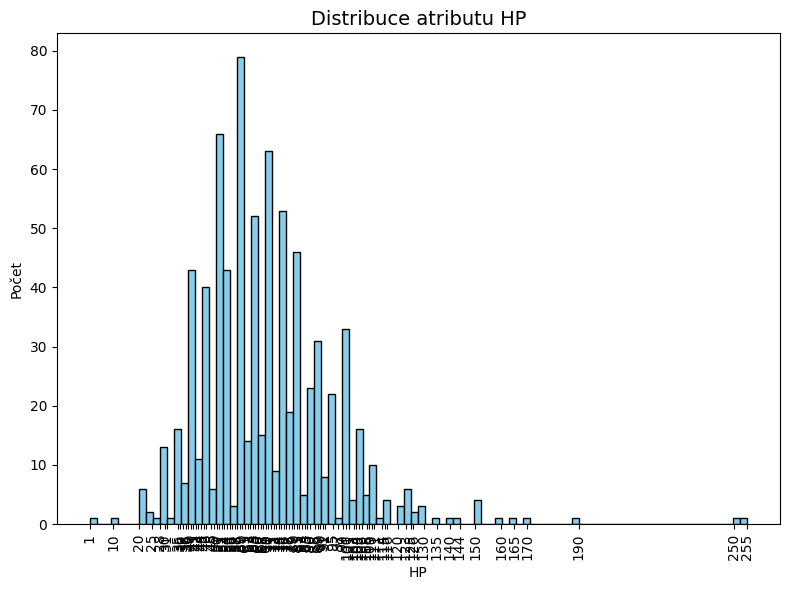

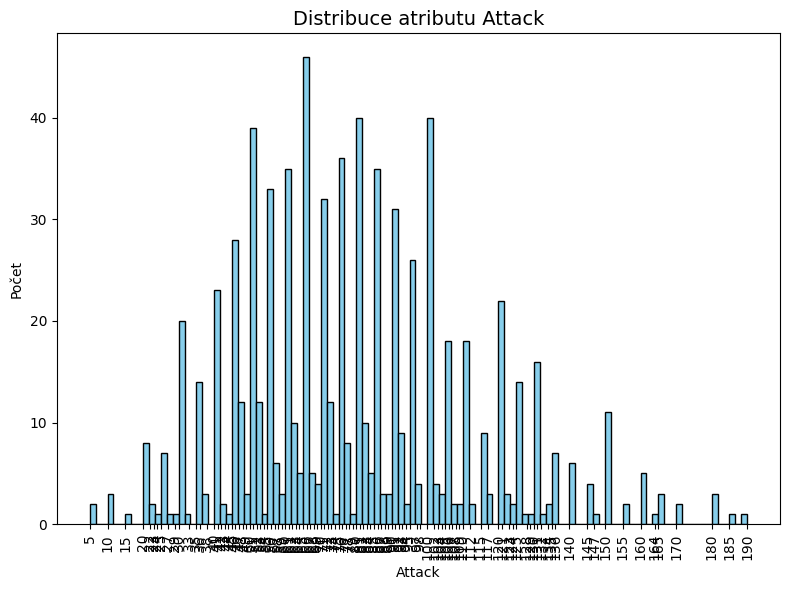

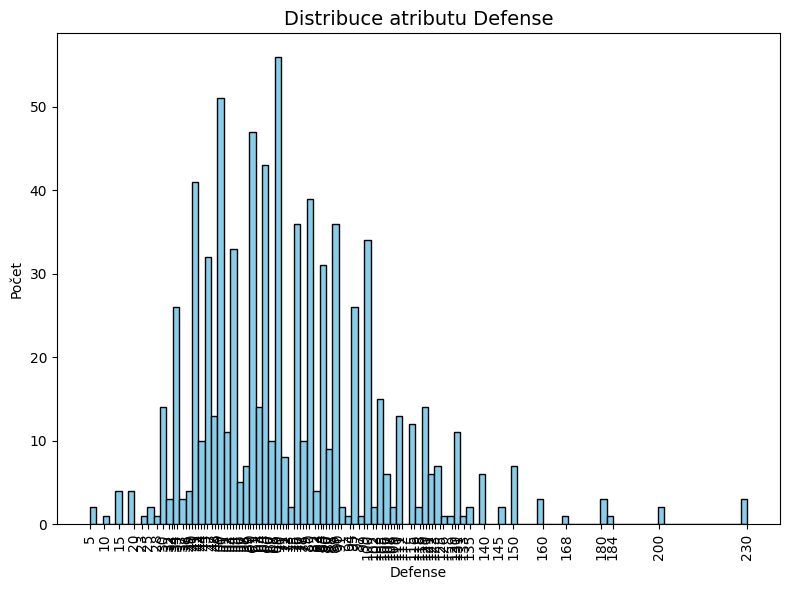

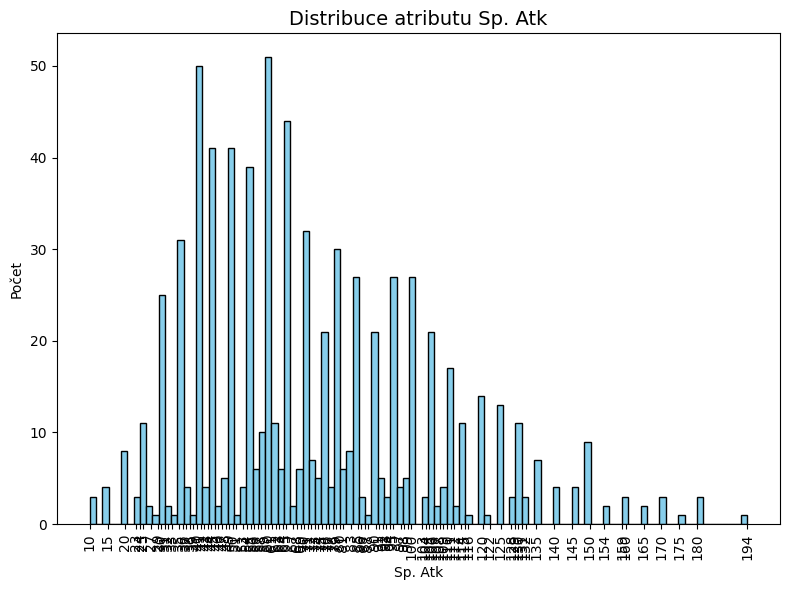

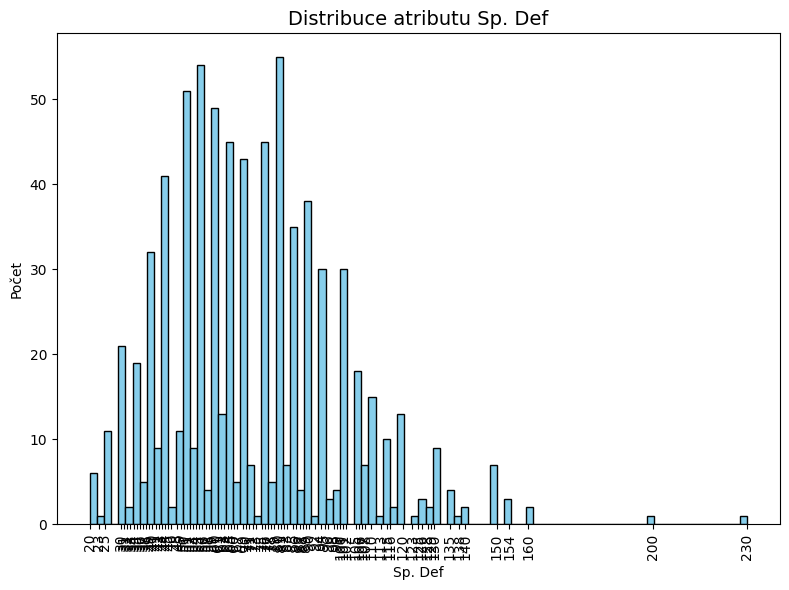

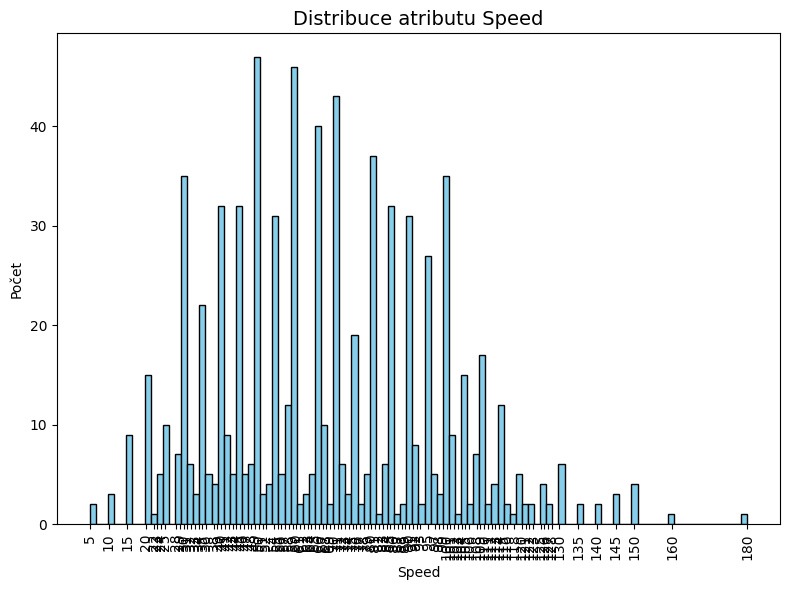

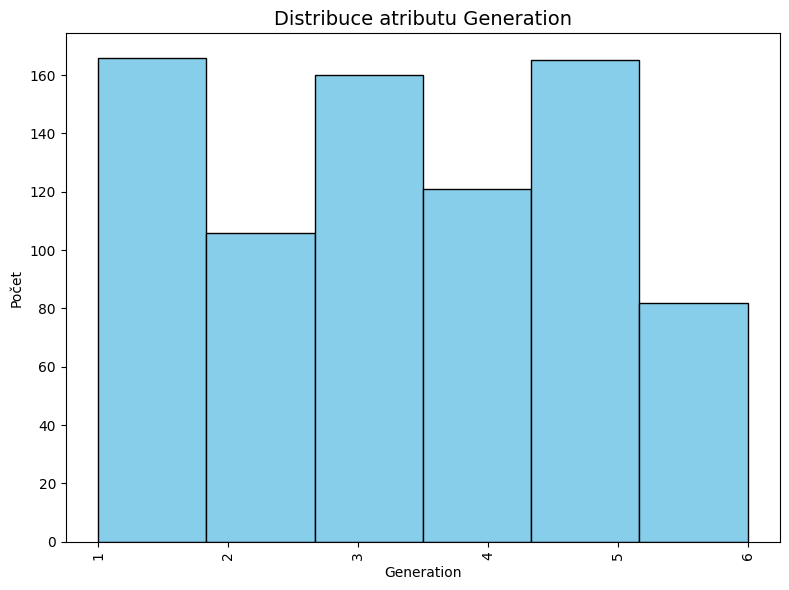

In [ ]:
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
for attribute in attributes:
  plt.figure(figsize=(8, 6))
  data = df[attribute].dropna()
  plt.hist(data, bins=len(data.unique()), color='skyblue', edgecolor='black', align='mid')

  plt.xticks(sorted(data.unique()), rotation=90)
  plt.title(f'Distribuce atributu {attribute}', fontsize=14)
  plt.xlabel(f'{attribute}')
  plt.ylabel('Počet')

  plt.tight_layout()
  plt.show()


### Popis
Číselné atributy 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation' mají normální rozdělení. Úsudek o typu rozdělení nám udává, který typ scaleru použijeme. V tomto případě pro všechny atributy použijeme StandardScaler.

Jediná výjimka je atribut 'Generation', který má rovnoměrné rozdělení.
Z toho vyplývá, že autoři vytvářeli pro každou generaci cca stejný počet Pokémonů. Jediná výjimka co lze z grafu vyčíst je generace 6, kde autorům asi docházely nápady. ;)

## Popis kategoriálních atributů

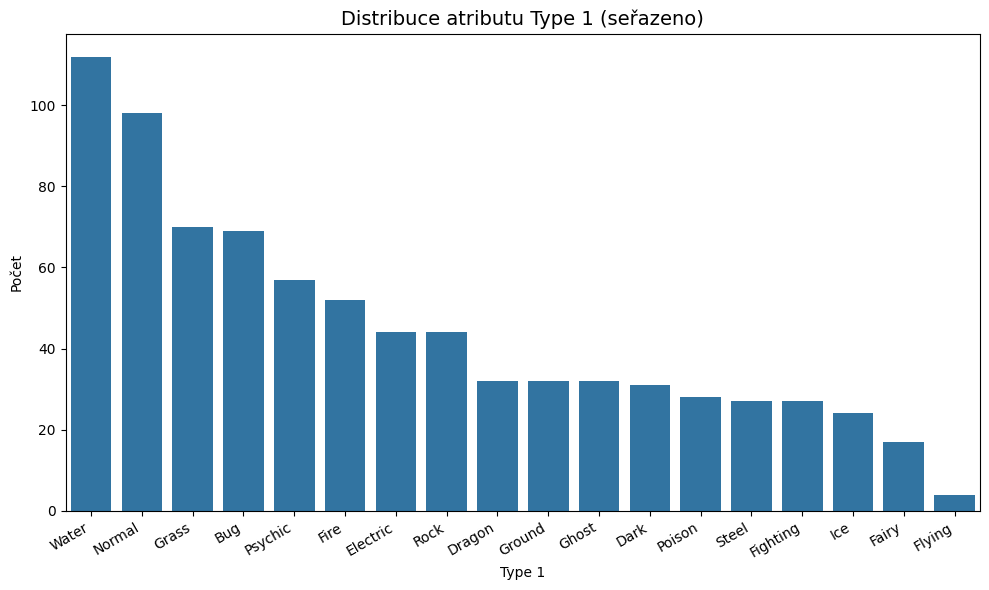

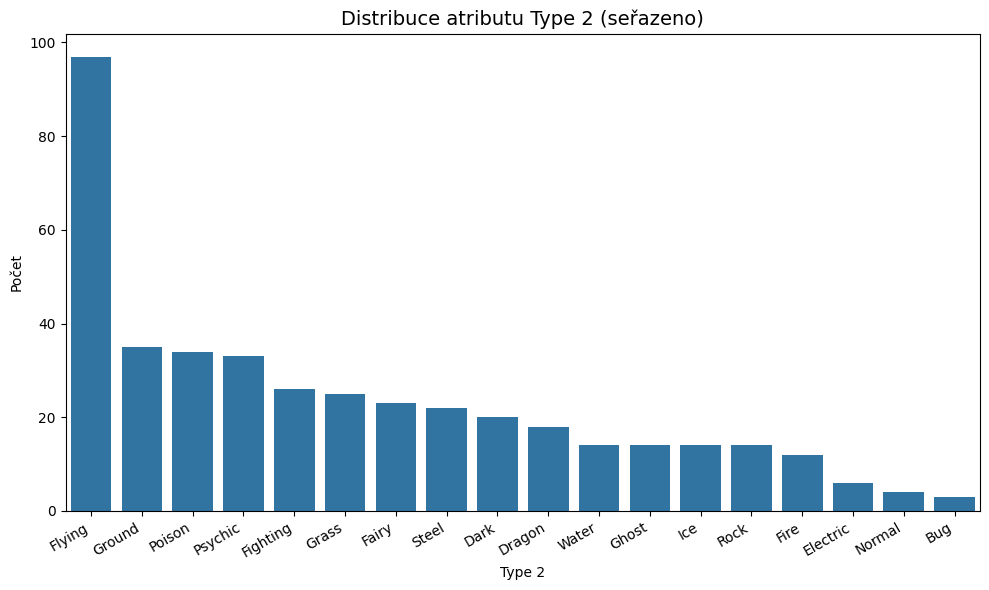

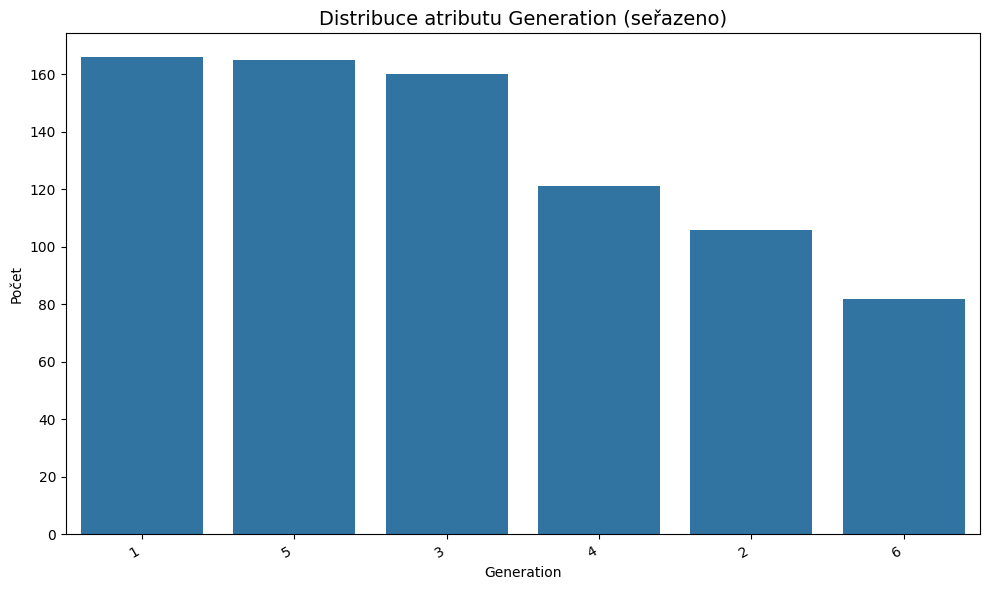

In [ ]:
attributes = ['Type 1', 'Type 2', 'Generation']
for attribute in attributes:
  plt.figure(figsize=(10, 6))
  plt.ylabel('Počet')
  plt.title(f'Distribuce atributu {attribute} (seřazeno)', fontsize=14)
  plt.xlabel(f'{attribute}')
  sns.countplot(data=df, x=attribute, order=df[attribute].value_counts().index)
  plt.xticks(rotation=30, ha='right')
  plt.tight_layout()
  plt.show()

### Popis
Největší zastoupení u 'Type 1' mají: Water, Normal, Grass a naopak nejmenší zastoupení mají Flying, Fairy, Ice

Největší zastoupení u 'Type 2' mají: Flying, Ground, Poison a naopak nejmenší zastoupení mají Bug, Normal, Electric



## Korelační matice pro numerické hodnoty

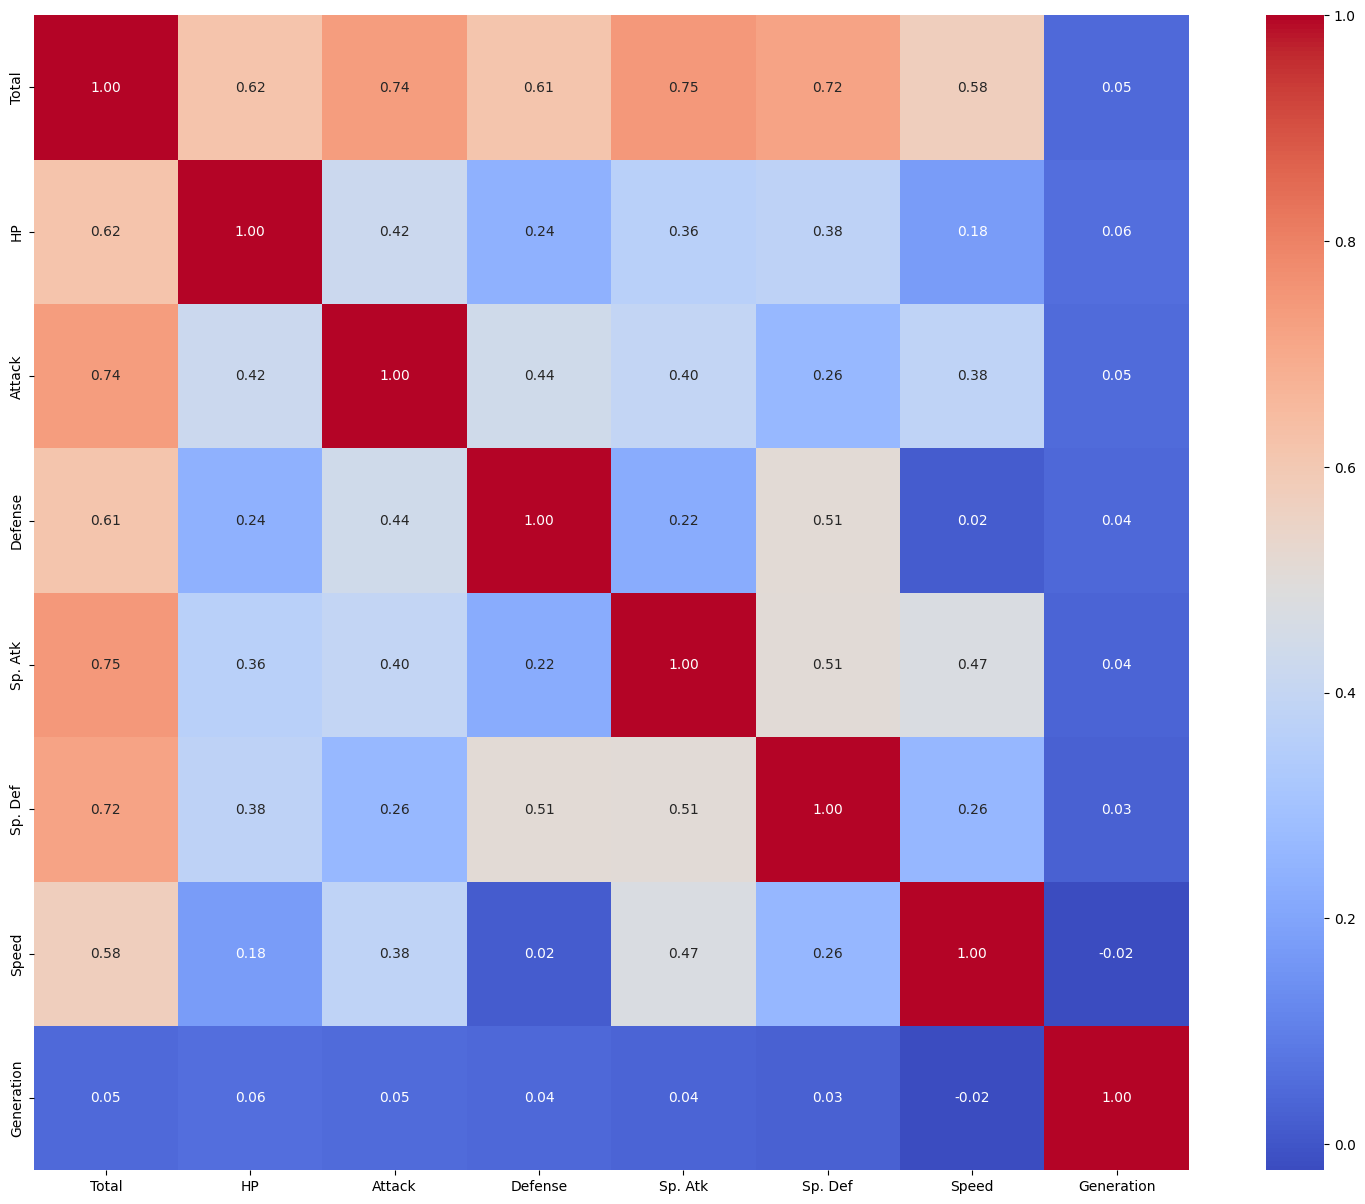

In [ ]:
numeric_df = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
corr_mat = numeric_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_mat, cmap='coolwarm', square=True, annot=True, fmt='.2f')
plt.show()

### Popis
Celková statistika Pokémonů je silně ovlivněna útokem, speciálním útokem a speciální obranou.
Obranné statistiky (obrana a speciální obrana) jsou navzájem pozitivně korelované, ale nemají téměř žádný vztah k rychlosti.
Generace Pokémonů nemá významnou korelaci s ostatními vlastnostmi.
Pokémoni s vysokým HP často nemají silnou rychlost ani obranu.
Tato korelační matice je užitečná pro pochopení vztahů mezi různými atributy Pokémonů a může pomoci při analýze nebo predikci jejich výkonu.

# Pre-processing

Z EDA plyne zjištění, že atributy "#" a "Name" nejsou důležité pro následující zpracování dat.

In [ ]:
df = df.drop(['#', 'Name'], axis=1)

Atributy 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed' mají normální rozdělení, proto bude v pre-processing části použit StandardScaler

In [ ]:
df_scaled = df.copy()
standard_scaler = StandardScaler()
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for attribute in attributes:
  df_scaled[attribute] = standard_scaler.fit_transform(df[[attribute]])

Atribut "Generation" lze převést pomocí One-Hot Encoding každou generaci na samostatný binární atribut. Tím v dalších krocích modelům umožníme pracovat s tímto atributem jako s kategorií.

To samé platí pro sloupce Type 1 a Type 2.

In [ ]:
pokemon_data = df_scaled

# One-Hot Encoding
generation_encoded = pd.get_dummies(pokemon_data['Generation'], prefix='Generation')
type1_encoded = pd.get_dummies(pokemon_data['Type 1'], prefix='Type1')
type2_encoded = pd.get_dummies(pokemon_data['Type 2'], prefix='Type2')

pokemon_data_encoded = pd.concat([pokemon_data, generation_encoded, type1_encoded, type2_encoded], axis=1)
pokemon_data_encoded.drop(['Generation', 'Type 1', 'Type 2'], axis=1, inplace=True)

df_scaled = pokemon_data_encoded

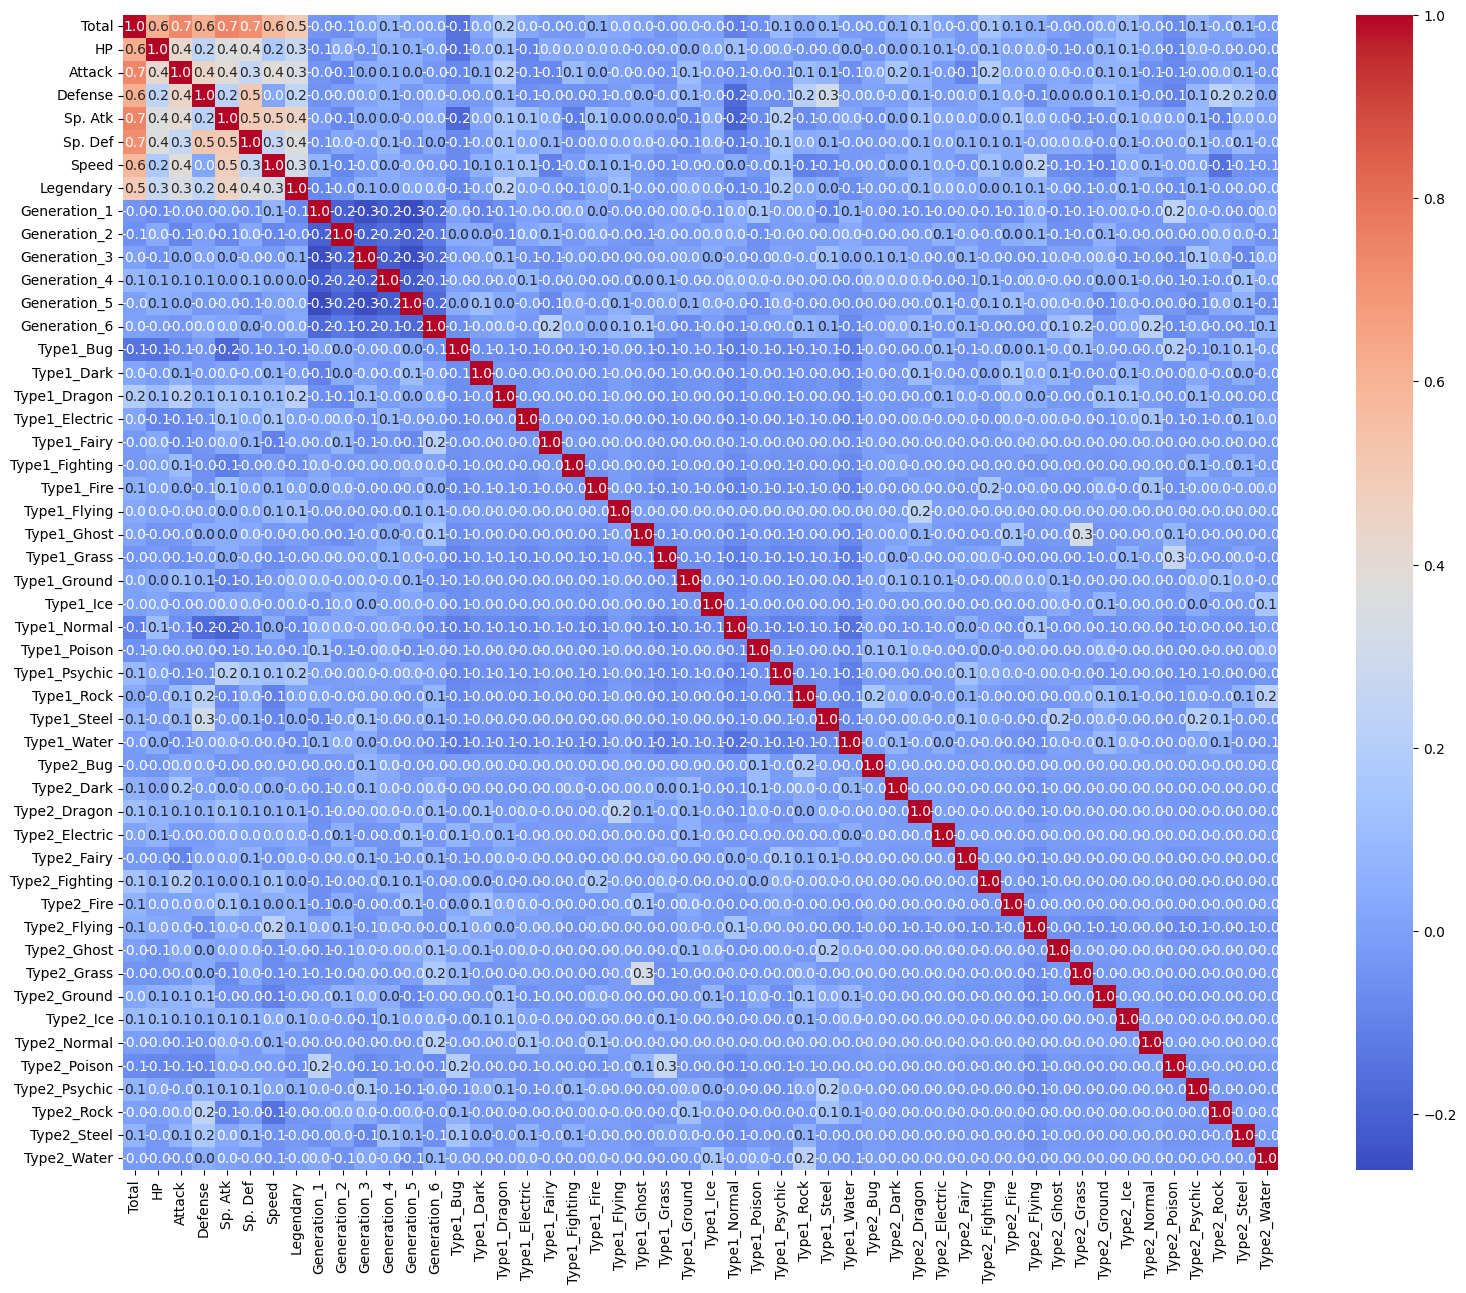

In [ ]:
corr_mat = df_scaled.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_mat, cmap='coolwarm', square=True, annot=True, fmt='.1f')

plt.show()

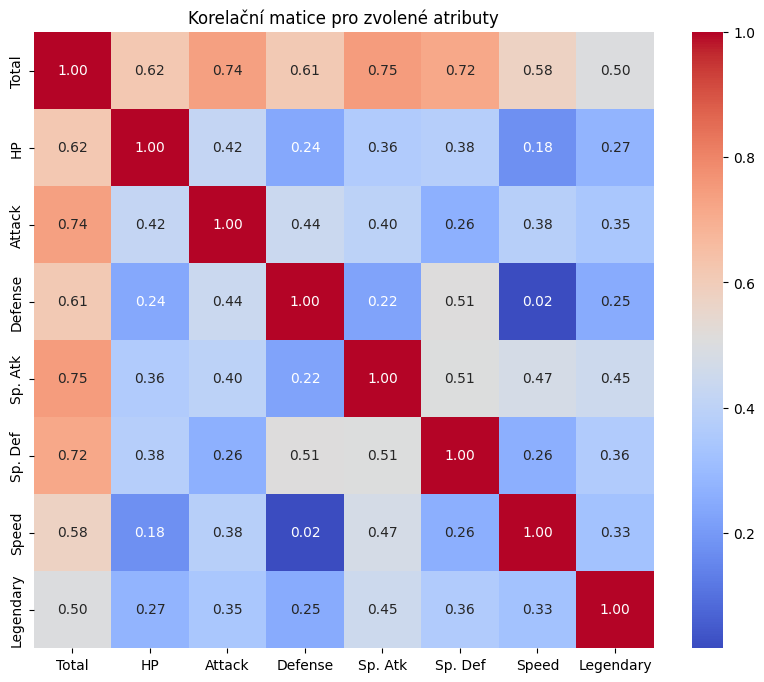

In [ ]:
corr_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']
corr_matrix = df_scaled[corr_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelační matice pro zvolené atributy')
plt.show()

Z grafu můžeme vidět, že všechny atributy ovlivňují finální 'Total' sílu Pokémona

# 1. Shlukování (K-means)
Důvody pro použití K-Means na Pokémony

### Identifikace podobností mezi Pokémony
Pokémoni mají různorodé statistiky a typy, což ztěžuje jejich manuální klasifikaci. K-Means může pomoci identifikovat Pokémony se společnými vlastnostmi, například útočně orientované Pokémony, defenzivní Pokémony nebo rychlé Pokémony.

### Redukce složitosti dat
Dataset obsahuje několik numerických atributů. K-Means umožňuje zjednodušit analýzu tím, že rozdělí Pokémony do omezeného počtu klastrů, které reprezentují jejich hlavní vlastnosti.

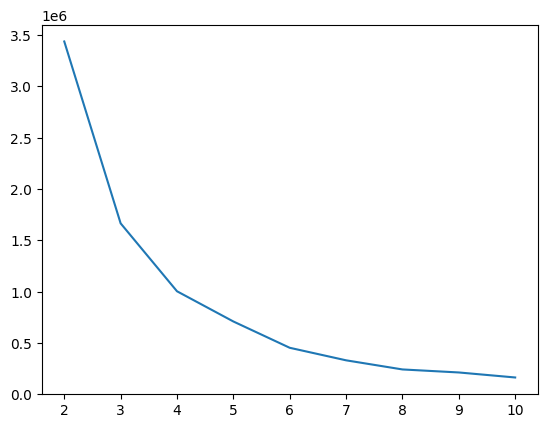

In [ ]:
clustering_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(df_scaled)
    kmeans.fit(df_scaled)
    clustering_scores.append(kmeans.inertia_)

plt.plot(range(2, 11), clustering_scores)
plt.show()

Z grafu lze pomocí Elbow method vyčíst, že ideální počet shluků jsou 3 nebo 4. PO vyzkoušení nahlédnutí na krabicové grafy jednotlivých číselných atributů jsem zvolil 4 shluky, protože mi dané rozložení přišlo zajímavé na popis.

In [ ]:
import sklearn.cluster
clusters = sklearn.cluster.KMeans(n_clusters=4, random_state=13).fit(df_scaled)

In [ ]:
df['cluster_id'] = clusters.labels_

<Axes: xlabel='cluster_id', ylabel='count'>

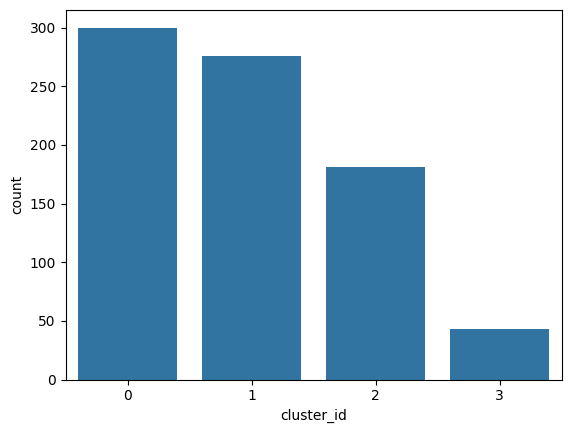

In [ ]:
sns.countplot(data=df, x='cluster_id')

Podle "mohutnosti" jednotlivých atributů vypadá K-Means jako ideální kandidát na shlukování. Např. v shluku č. 3 by se mohlo jednat buď o velmi silné nebo slabé Pokémony.

In [ ]:
df.shape

(800, 12)

In [ ]:
for i in range(4):
  cluster_i_pokemons = df[df['cluster_id'] == i]
  num_pokemons_cluster_i = len(cluster_i_pokemons)
  num_legendary_cluster_i = len(cluster_i_pokemons[cluster_i_pokemons['Legendary'] == True])
  print(f"Počet Pokémonů v shluku {i}: {num_pokemons_cluster_i}")
  print(f"Počet legendárních Pokémonů v shluku {i}: {num_legendary_cluster_i}")

Počet Pokémonů v shluku 0: 300
Počet legendárních Pokémonů v shluku 0: 0
Počet Pokémonů v shluku 1: 276
Počet legendárních Pokémonů v shluku 1: 0
Počet Pokémonů v shluku 2: 181
Počet legendárních Pokémonů v shluku 2: 37
Počet Pokémonů v shluku 3: 43
Počet legendárních Pokémonů v shluku 3: 28


Z výsledku kódu výše lze vidět, že ve shluku č. 3 se vyskytuje většina pokémonu se statusem "Legendary". Předpoklad tedy je, že v shluku č. 3 budou velmi silní Pokémoni

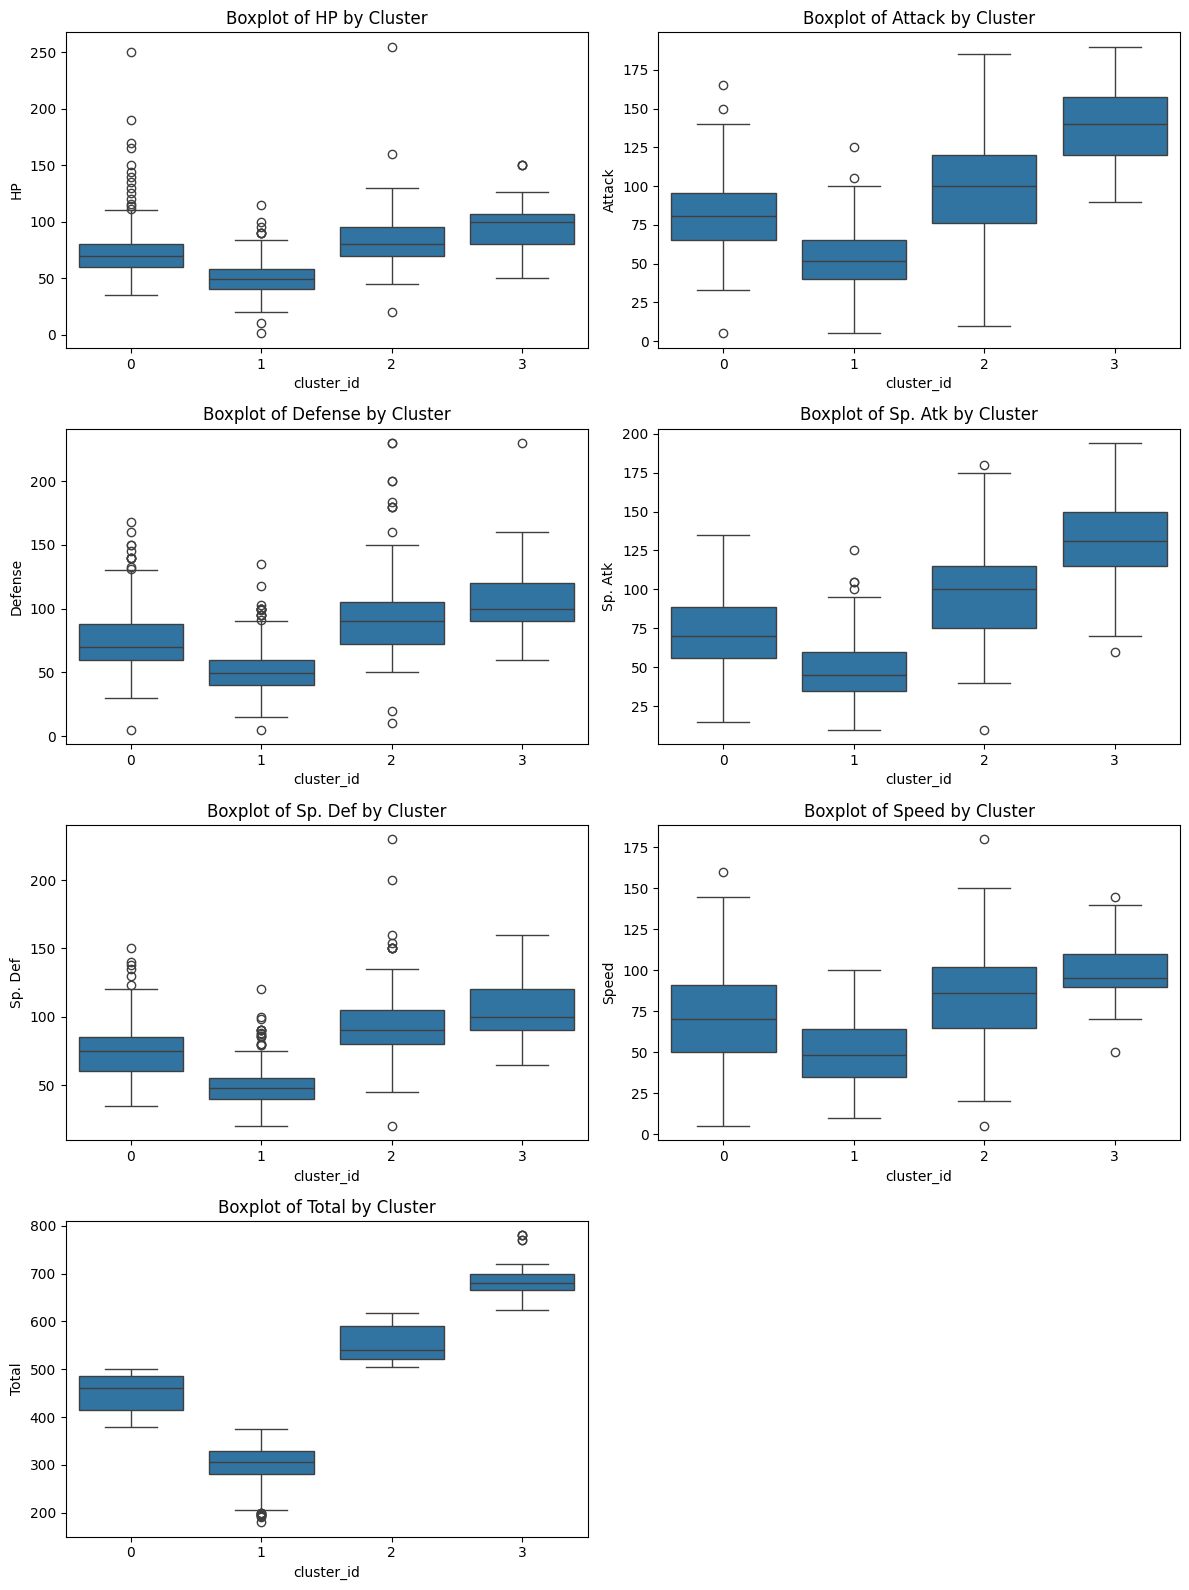

In [ ]:
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Total']
num_attributes = len(attributes)
num_rows = (num_attributes + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

axes = axes.flatten()

for i, attribute in enumerate(attributes):
    if attribute in df.columns:
        sns.boxplot(x='cluster_id', y=attribute, data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot of {attribute} by Cluster')
    else:
        print(f"Warning: Column '{attribute}' not found in X_test. Skipping boxplot.")

if num_attributes % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Popis (Krabicové grafy)

### HP
Pro atribut HP lze pozorovat, že shluk 0 má širší rozsah hodnot s mediánem kolem 75, zatímco shluk 3 má vyšší hodnoty HP s mediánem blízko 100 a menší variabilitu. shluk 2 ukazuje střední hodnoty HP s několika odlehlými hodnotami, které přesahují 150. V shluku 1 se vyskytuje Pokémon s nejmenším počtem životů, zatímco Pokémoni s nejvyššími životy se vyskytují v shluku 0 a 2

### Attack
Atribut Attack vykazuje nejvyšší hodnoty v shluku 3, kde medián dosahuje hodnoty kolem 125. Shluky 0 a 1 mají nižší hodnoty útoku, přičemž shluk 1 má nižší variabilitu. Shluk 2 ukazuje střední hodnoty útoku s největším rozptylem.

### Defense
Pro Defense je zřejmé, že shluk 3 má nejvyšší hodnoty obrany s mediánem blízko 100. Naopak shluk 1 má nižší obranné statistiky s mediánem kolem 50 a menším rozpětím. Shluky 0 a 2 mají průměrné hodnoty obrany, přičemž shluk 2 vykazuje největší rozsah ze všech shluků.

### Sp. Atk
Atribut Sp. Atk ukazuje nejvyšší hodnoty ve klastru 3, kde medián dosahuje hodnoty cca 125, zatímco shluky 0 a 1 mají podobné nižší hodnoty s menším rozpětím. Shluk 2 má střední hodnoty s širším rozptylem, což naznačuje vyšší variabilitu.

### Sp. Def
V případě Sp. Def mají shluky 2 a 3 podobné mediány kolem 100, což ukazuje na vyšší obranné schopnosti těchto skupin. Shluk 1 má nižší hodnoty s mediánem kolem 50 a mnoho outliery, zatímco shluk 0 vykazuje široké rozpětí hodnot s vyšším mediánem.

### Speed
Pro atribut Speed je patrné, že shluk 3 má nejvyšší medián rychlosti, zatímco shluk 1 vykazuje nejnižší hodnoty. shluky 0 a 2 mají střední hodnoty rychlosti s mírně odlišnými rozsahy a několika odlehlými hodnotami.

### Total
Celkové statistiky, reprezentované atributem Total, ukazují, že shluk 3 zahrnuje Pokémony s nejvyššími celkovými hodnotami, přičemž medián překračuje 600. Naopak shluk 1 má nejnižší celkové hodnoty s mediánem kolem 300. shluky 0 a 2 se nacházejí mezi těmito extrémy, přičemž shluk 2 má širší rozpětí.

### Závěr
Celkově lze konstatovat, že ve shluku č. 3 se nachází silnější Pokémoni. Tito pokémoni v ničem extra nevynikají, ale na druhou stranu nejsou v ničem nejhorší. Naopak nejslabší Pokémoni se vyskytují v shluku 1, kde jejich jediné pozitivum je Sp. Atk a Speed. Shluk 2 vyniká rozptylem speciálních útoků a rychlostí, celkově jsou zde Pokémoni hodnoceni mezi 500 - 600 (atribut Total). Ve shluku 0 se vyskytují velmi průměrní Pokémoni (viz. graf počtu Pokémonů v jednotlivých shlucích).

Na závěr lze potvrdit hypotéza z předchozího kódu a to, že v shluku č. 3 se vyskytují velmi silní / legendární Pokémoni

### Popis kategoriálních atributů

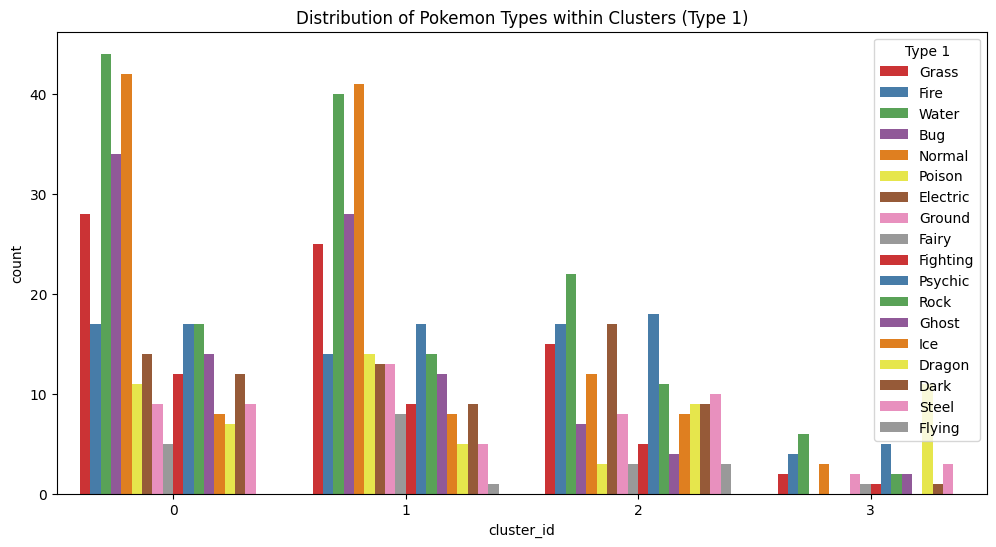

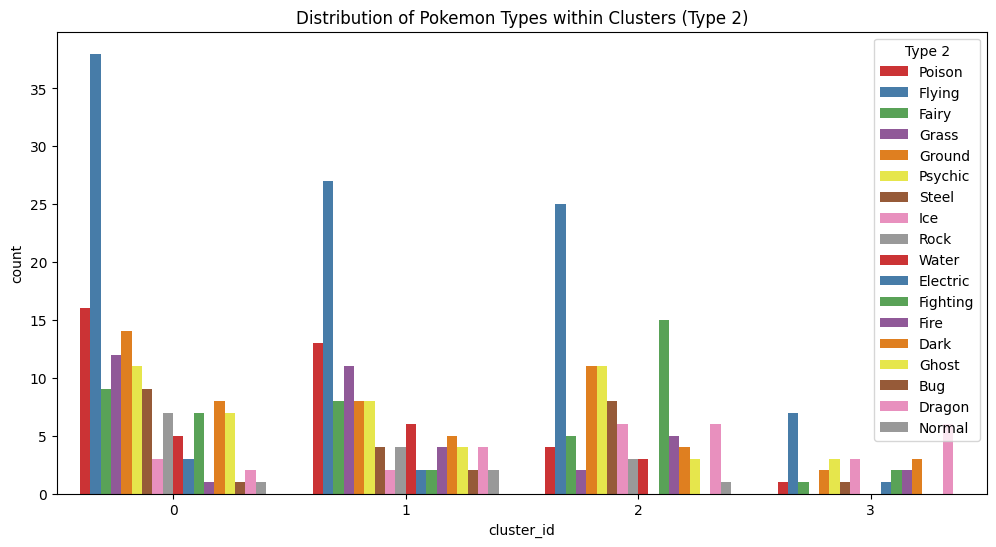

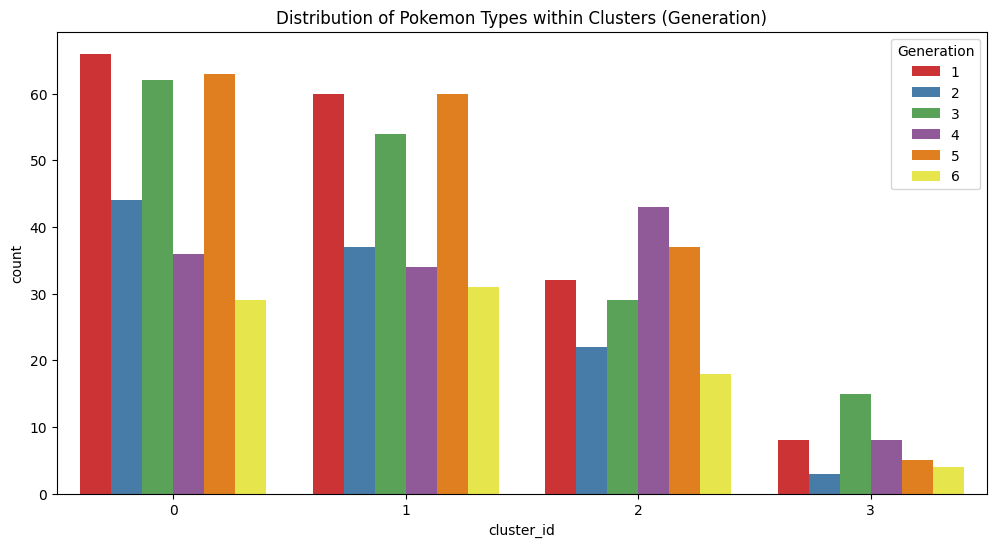

In [ ]:
attributes = ['Type 1', 'Type 2','Generation']

for atr in attributes:
  plt.figure(figsize=(12, 6))
  sns.countplot(data=df, x='cluster_id', hue=atr, palette='Set1')
  plt.title(f'Distribution of Pokemon Types within Clusters ({atr})')
  plt.show()

V grafu je patrné, že určité typy Pokémonů mají různou četnost v jednotlivých shlucích. Například v některých shlucích, jako je shluk 0 a shluk 1, dominují typy jako Grass a Water. Tyto typy vykazují vysokou četnost ve srovnání s méně častými typy, jako je třeba Ice nebo Steel, které se objevují v menším počtu napříč všemi shluky. Každý shluk má tedy specifické složení Pokémonů, což naznačuje určité charakteristiky typů, které shluky odlišují.

Distribuce ukazuje, že rozdělení typů není z vlastností datasetu rovnoměrné, což může odrážet různé vlastnosti, podle kterých byly Pokémoni seskupeni. Celkově lze říci, že některé typy (například Grass a Water) se vyskytují poměrně hojně, zatímco jiné typy jsou spíše vzácné a omezují se na specifické shluky.

# 2. Shlukování (Agglomerative Clustering)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Credit to https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(linkage_matrix, **kwargs)
    plt.ylabel('distance')

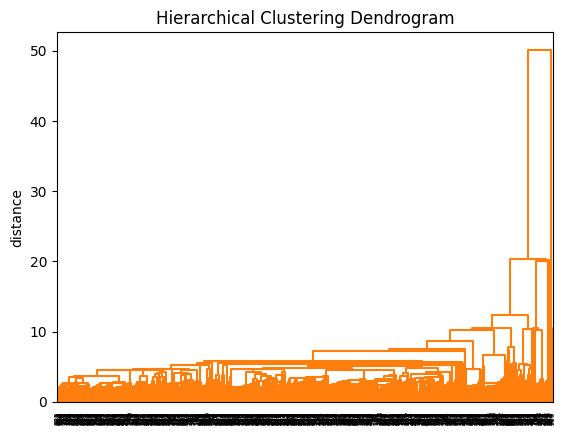

In [ ]:
clustering = AgglomerativeClustering(linkage="single", distance_threshold=0,n_clusters= None)
clustering.fit(df_scaled)
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

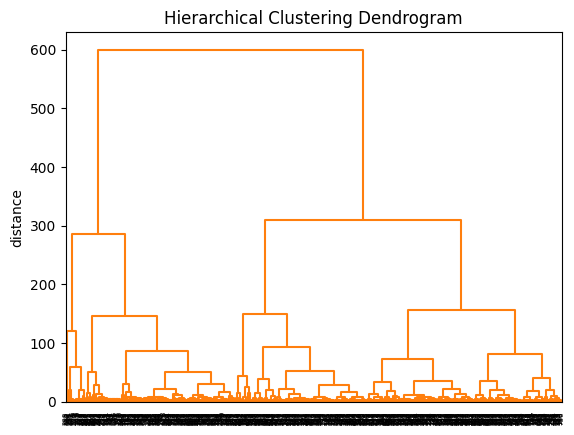

In [ ]:
clustering = AgglomerativeClustering(linkage="complete", distance_threshold=0,n_clusters= None)
clustering.fit(df_scaled)
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

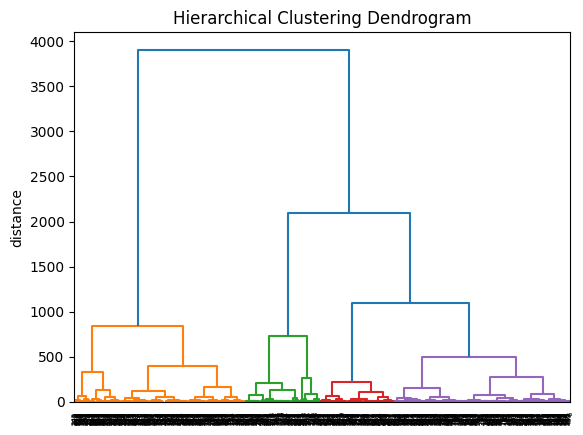

In [ ]:
clustering = AgglomerativeClustering(linkage="ward", distance_threshold=0,n_clusters= None)
clustering.fit(df_scaled)
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

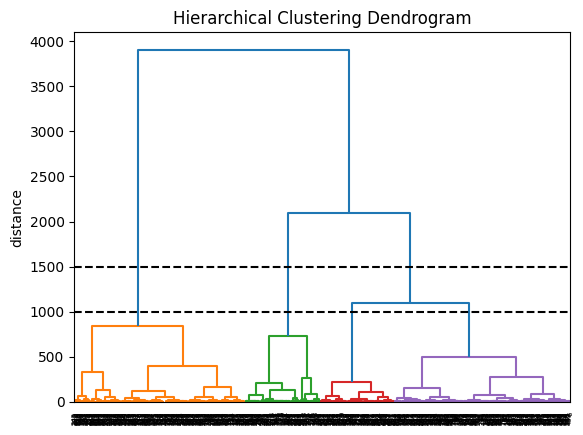

In [ ]:
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.axhline(y=1500, color='black', linestyle='--')
plt.axhline(y=1000, color='black', linestyle='--')

Z grafů výše lze vidět, že metrika single a complete linkage není úplně vhodná. Na druhou stranu metrika ward se zdá být jako ta ideální, protože z této metriky vyplývá, že ideální počet shluků jsou 3 nebo 4.

V následujícím kódu ověříme validaci pomocí interní metriky Silhouette Score

Počet shluků: 2, Silhouette Score: 0.598
Počet shluků: 3, Silhouette Score: 0.607
Počet shluků: 4, Silhouette Score: 0.569
Počet shluků: 5, Silhouette Score: 0.578
Počet shluků: 6, Silhouette Score: 0.586
Počet shluků: 7, Silhouette Score: 0.559
Počet shluků: 8, Silhouette Score: 0.545
Počet shluků: 9, Silhouette Score: 0.561
Optimální počet shluků je 3.


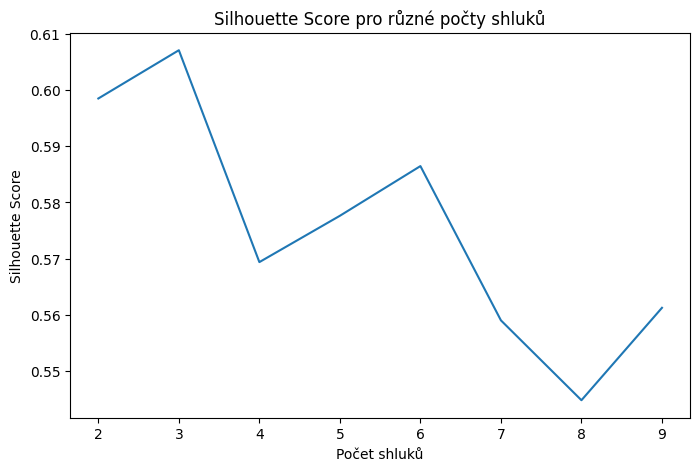

In [ ]:
range_n_clusters = range(2, 10)
silhouette_scores = []

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clustering.fit_predict(df_scaled)

    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f"Počet shluků: {n_clusters}, Silhouette Score: {score:.3f}")


optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimální počet shluků je {optimal_clusters}.")

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores)
plt.title("Silhouette Score pro různé počty shluků")
plt.xlabel("Počet shluků")
plt.ylabel("Silhouette Score")
plt.show()

Z validace Silhouette Score vyplývá, že ideální počet shluků jsou 3.

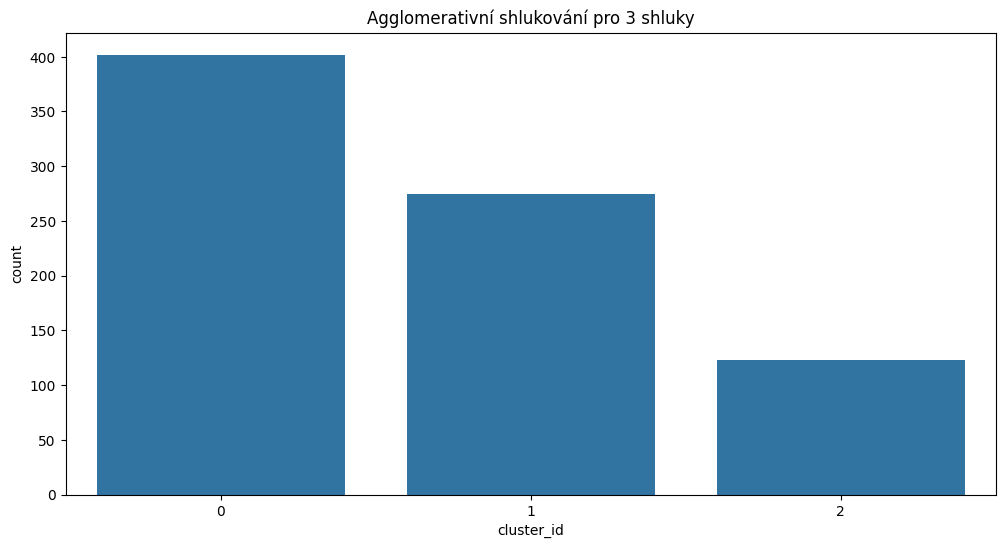

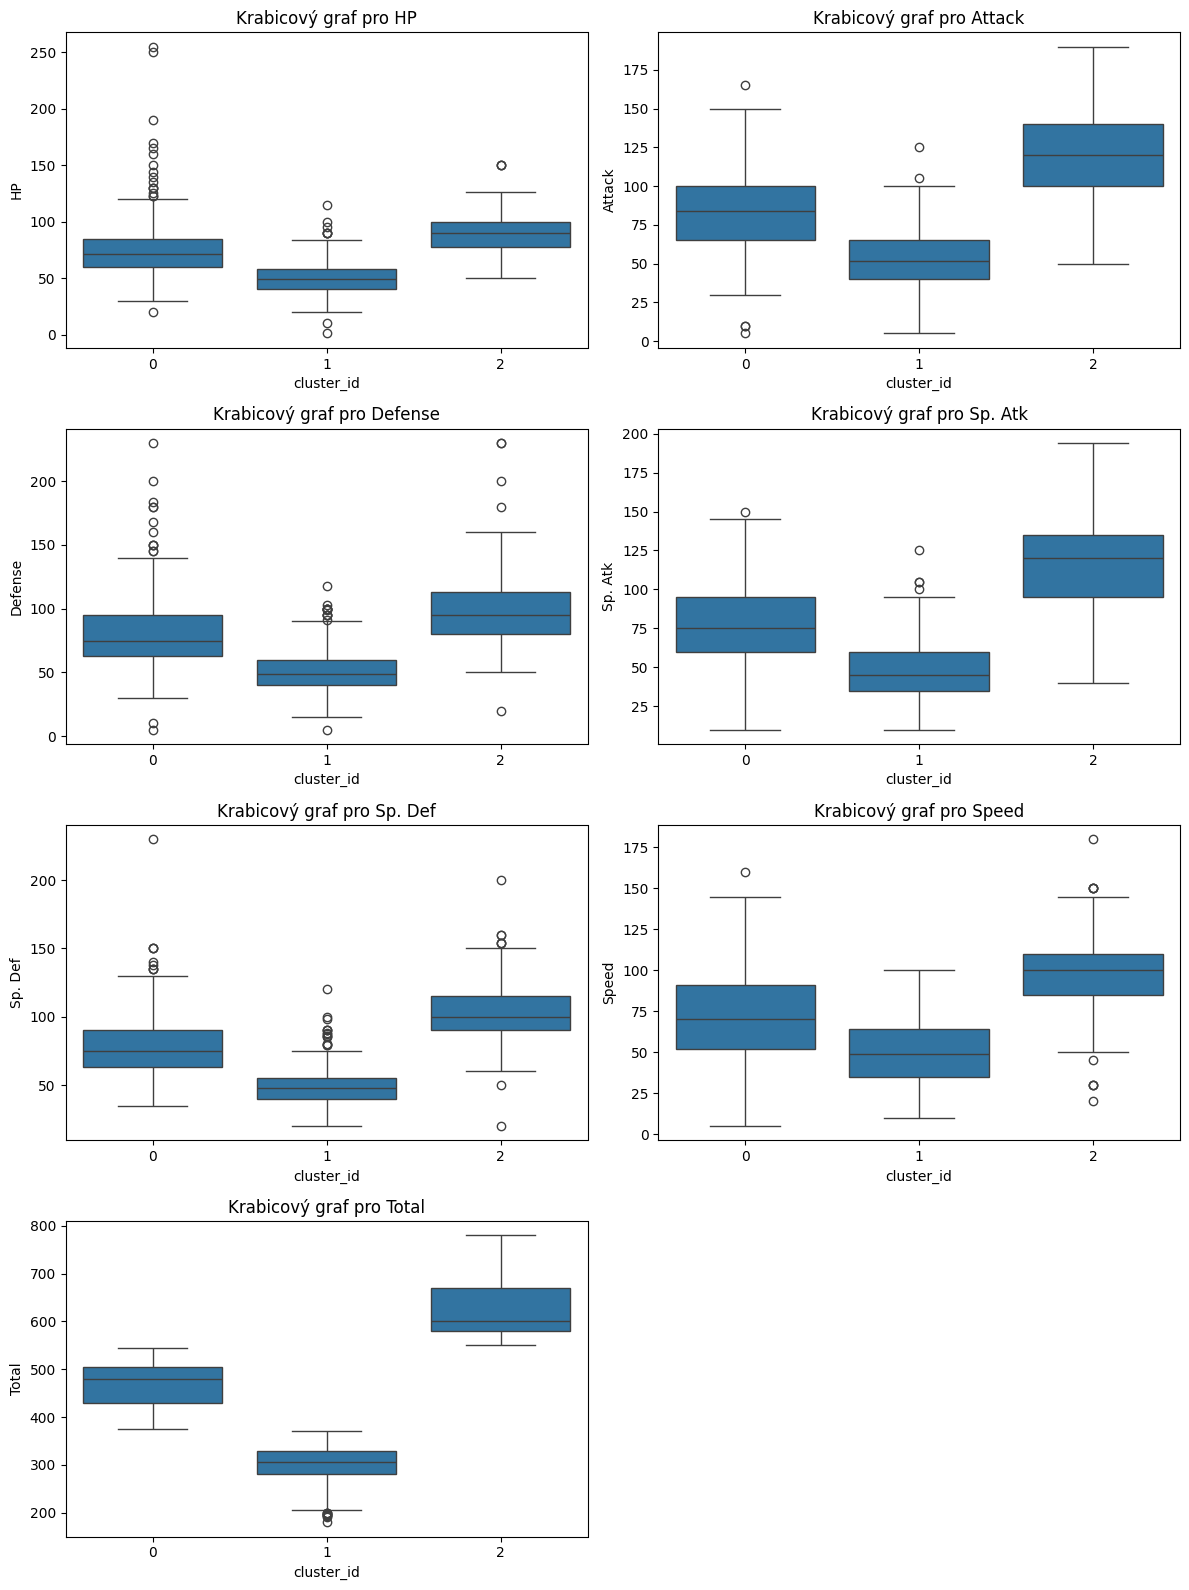

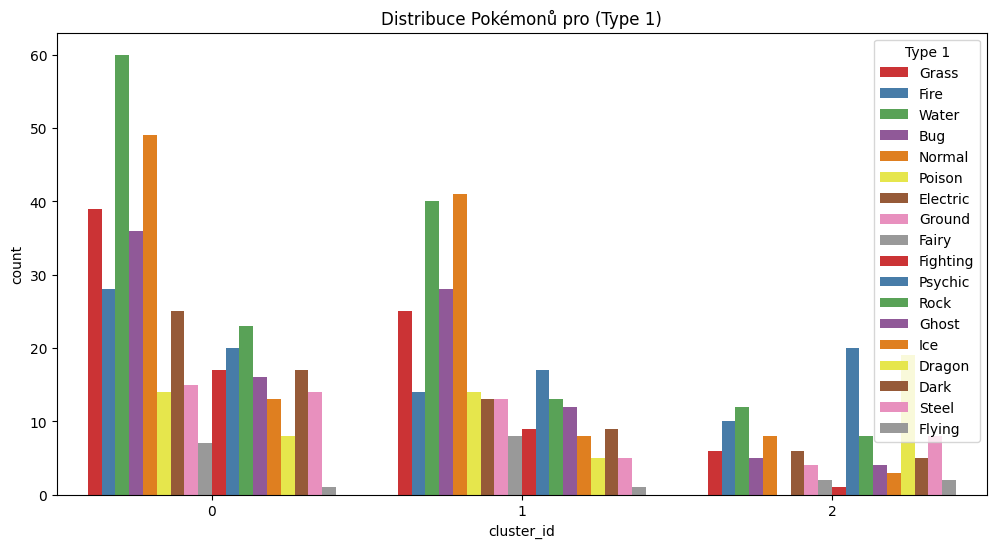

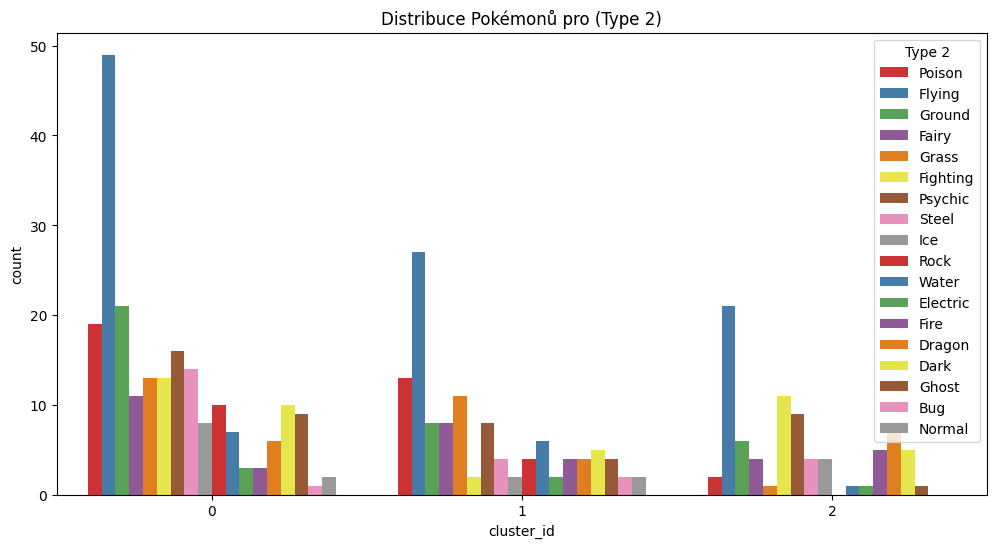

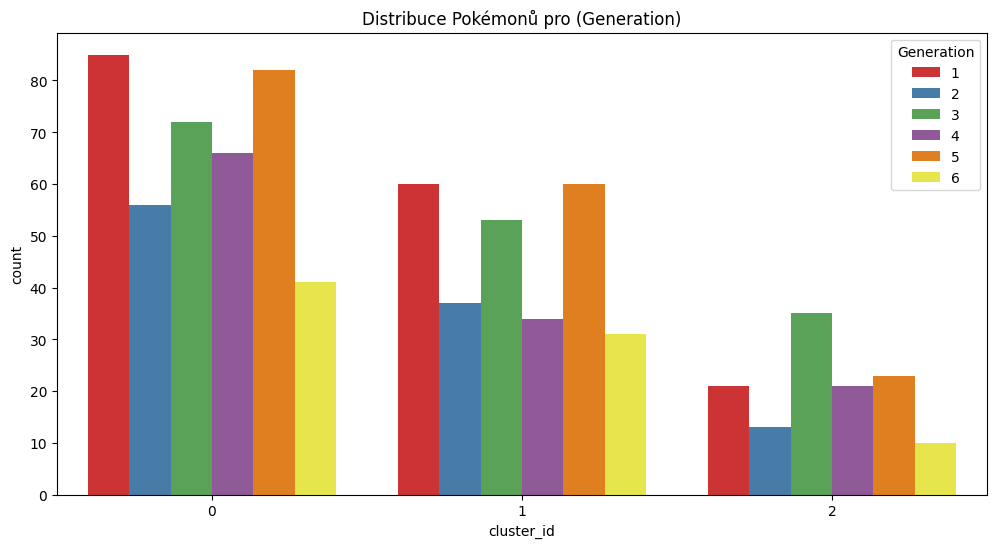

In [ ]:
clustering = AgglomerativeClustering(n_clusters=3)
cluster_labels = clustering.fit_predict(df_scaled)

df['cluster_id'] = cluster_labels

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cluster_id')
plt.title('Agglomerativní shlukování pro 3 shluky')
plt.show()

attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Total']
num_attributes = len(attributes)
num_rows = (num_attributes + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

axes = axes.flatten()

for i, attribute in enumerate(attributes):
    if attribute in df.columns:
        sns.boxplot(x='cluster_id', y=attribute, data=df, ax=axes[i])
        axes[i].set_title(f'Krabicový graf pro {attribute}')
    else:
        print(f"Warning: Column '{attribute}' not found in X_test. Skipping boxplot.")

if num_attributes % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()
attributes = ['Type 1', 'Type 2','Generation']

for atr in attributes:
  plt.figure(figsize=(12, 6))
  sns.countplot(data=df, x='cluster_id', hue=atr, palette='Set1')
  plt.title(f'Distribuce Pokémonů pro ({atr})')
  plt.show()

## Popis (Krabicové grafy)

### HP
Pokémoni v shluku č. 0 jsou titáni. Jejich HP je vysoké a daleko převyšuje ostatní shluky. To z nich dělá ideální tanky, schopné vydržet i ty nejprudší útoky. Naproti tomu Pokémoni ve shluku č. 1 a 2 mají HP spíše průměrné, což naznačuje, že jejich strategie v bitvě bude spíše založena na rychlých útocích a vyhýbání se nepřátelským úderům.

### Attack a Sp. Atk
Pokémoni s velkou sílou se vyskytují v shluku č. 2. Pokémoni v této skupině vynikají jak v normálních, tak ve speciálních útocích. Pokémoni v prvním shluku jsou spíše vyvážení, zatímco třetí shluk se může pochlubit vyššími speciálními útoky, což naznačuje, že jejich síla spočívá v magických schopnostech.

### Defense a Sp. Def
Pokémoni v shluku č. 0 jsou nejen odolní co do HP, ale také vynikají v obraně. Pokémoni ve  shluku č. 2 mají obranu spíše průměrnou, zatímco shluk č. 3 se může pochlubit vyšší obranou, což naznačuje, že jsou odolní vůči obyčejným útokům.

### Speed
Pokémoni v 2. skupině jsou skutečně rychlí a dokáží soupeře překvapit svou rychlostí. Pokémoni v shluku č. 0 jsou spíše pomalejší, což je kompenzováno jejich vysokou životní silou a obranou.

### Total: Kdo je tím nejlepším Pokémonem?
Celkový součet všech statistik nám ukazuje, kteří Pokémoni jsou nejuniverzálnější. Pokémoni v shluku č. 2 mají nejvyšší celkový součet, což znamená, že jsou velmi silní a dokáží se vypořádat s různými typy soupeřů. Pokémoni ve shluku č. 0 a 1 mají celkový součet nižší, což naznačuje, že jejich síla spočívá v konkrétních oblastech.

### Závěr
Každý shluk představuje jedinečnou skupinu Pokémonů, kteří se od sebe liší svými silnými a slabými stránkami.

## Popis (Kategoriální atributy)

### Type 1
Tento graf nám ukazuje, jak se jednotlivé typy Pokémonů rozdělují napříč třemi různými shluky. Každý sloupec představuje jeden shluk, a každý barevný segment v rámci sloupce odpovídá určitému typu Pokémona.

### Co nám graf říká:
Různorodost typů v každém shluku: Vidíme, že každý shluk obsahuje mix různých typů Pokémonů. To znamená, že shlukování nezaložilo skupiny pouze na základě jednoho dominantního typu.
Některé typy Pokémonů jsou v určitých shlucích zastoupeny výrazněji než jiné. Například v prvním shluku (cluster_id = 0) převažují Pokémoni typu "Water" a "Normal". Ve druhém shluku (cluster_id = 1) je zase výrazně zastoupený typ "Water".
Některé typy Pokémonů jsou v některých shlucích zastoupeny jen minimálně nebo vůbec. Například typ "Steel" je ve všech shlucích zastoupen poměrně málo.

### Závěr:
Tento graf nám poskytuje zajímavý pohled na to, jak se různé typy Pokémonů rozprostřují napříč různými shluky. Ačkoliv nám neposkytuje úplný obraz o tom, proč jsou Pokémoni shluknuti právě tímto způsobem.


## Type 2

### Co nám graf říká:

Různorodost typů v každém shluku: Stejně jako u primárních typů, i zde vidíme, že každý shluk obsahuje mix různých sekundárních typů. To ukazuje, že shlukování Pokémonů není založeno pouze na jednom dominantním typu, ale na komplexní kombinaci vlastností.
Dominantní typy v jednotlivých shlucích: Některé sekundární typy jsou v určitých shlucích zastoupeny výrazněji než jiné. Například v prvním shluku (cluster_id = 0) převažují Pokémoni typu "Flying". Ve druhém shluku (cluster_id = 1) je zase výrazně zastoupený typ "Flying".

Některé sekundární typy jsou v některých shlucích zastoupeny jen minimálně nebo vůbec. Například typ "Steel" je ve všech shlucích zastoupen poměrně málo.

Sekundární typ může výrazně ovlivnit vlastnosti Pokémona, jako je jeho odolnost vůči různým typům útoků nebo jeho schopnosti. Tento graf nám může pomoci odhalit zajímavé kombinace primárních a sekundárních typů a jejich dopad na vlastnosti Pokémonů.

### Závěr:
Lze pozorovat zajímavou tendenci že v každém shluku se alespoň jednou vyskytuje každý druh Pokémona. Proto lze tvrdit že atribut "Type 1" ani "Type 2" nebyly pro shlukovací algoritmus prioritní (viz. zvolení atributů u aglomerativního shlukování).


# 3. Shlukování (DBSCAN)

In [ ]:
selected_features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Total']
df_dbscan = df_scaled[selected_features]

best_eps = None
best_min_samples = None
best_score = -1

eps_values = np.linspace(0.1, 0.5, 100)
min_samples_values = range(2, 50)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = sklearn.cluster.DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_dbscan)

        # Ignore clusters with all noise
        if len(set(labels)) > 1:
            score = sklearn.metrics.silhouette_score(df_dbscan, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")


Best eps: 0.1, Best min_samples: 6, Best Silhouette Score: 0.10891872715654433


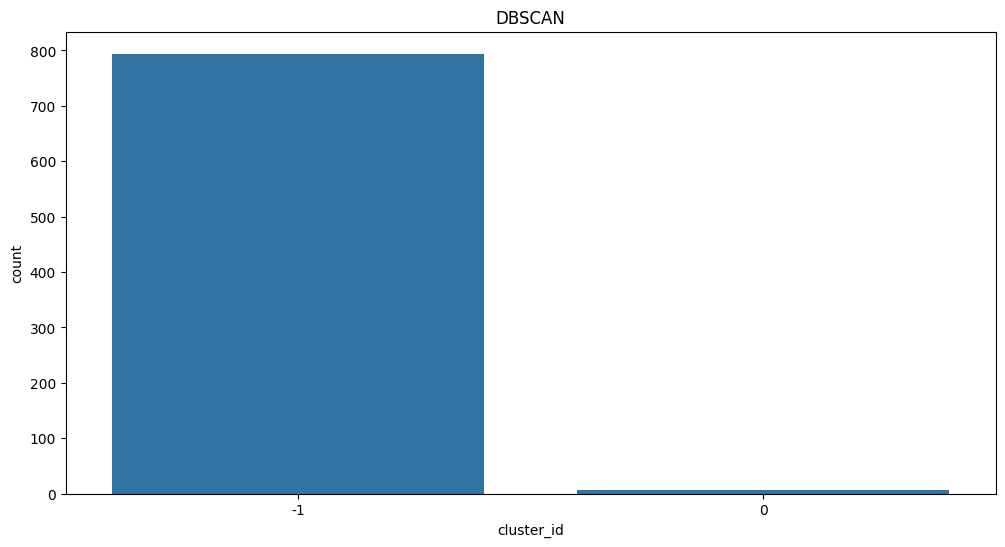

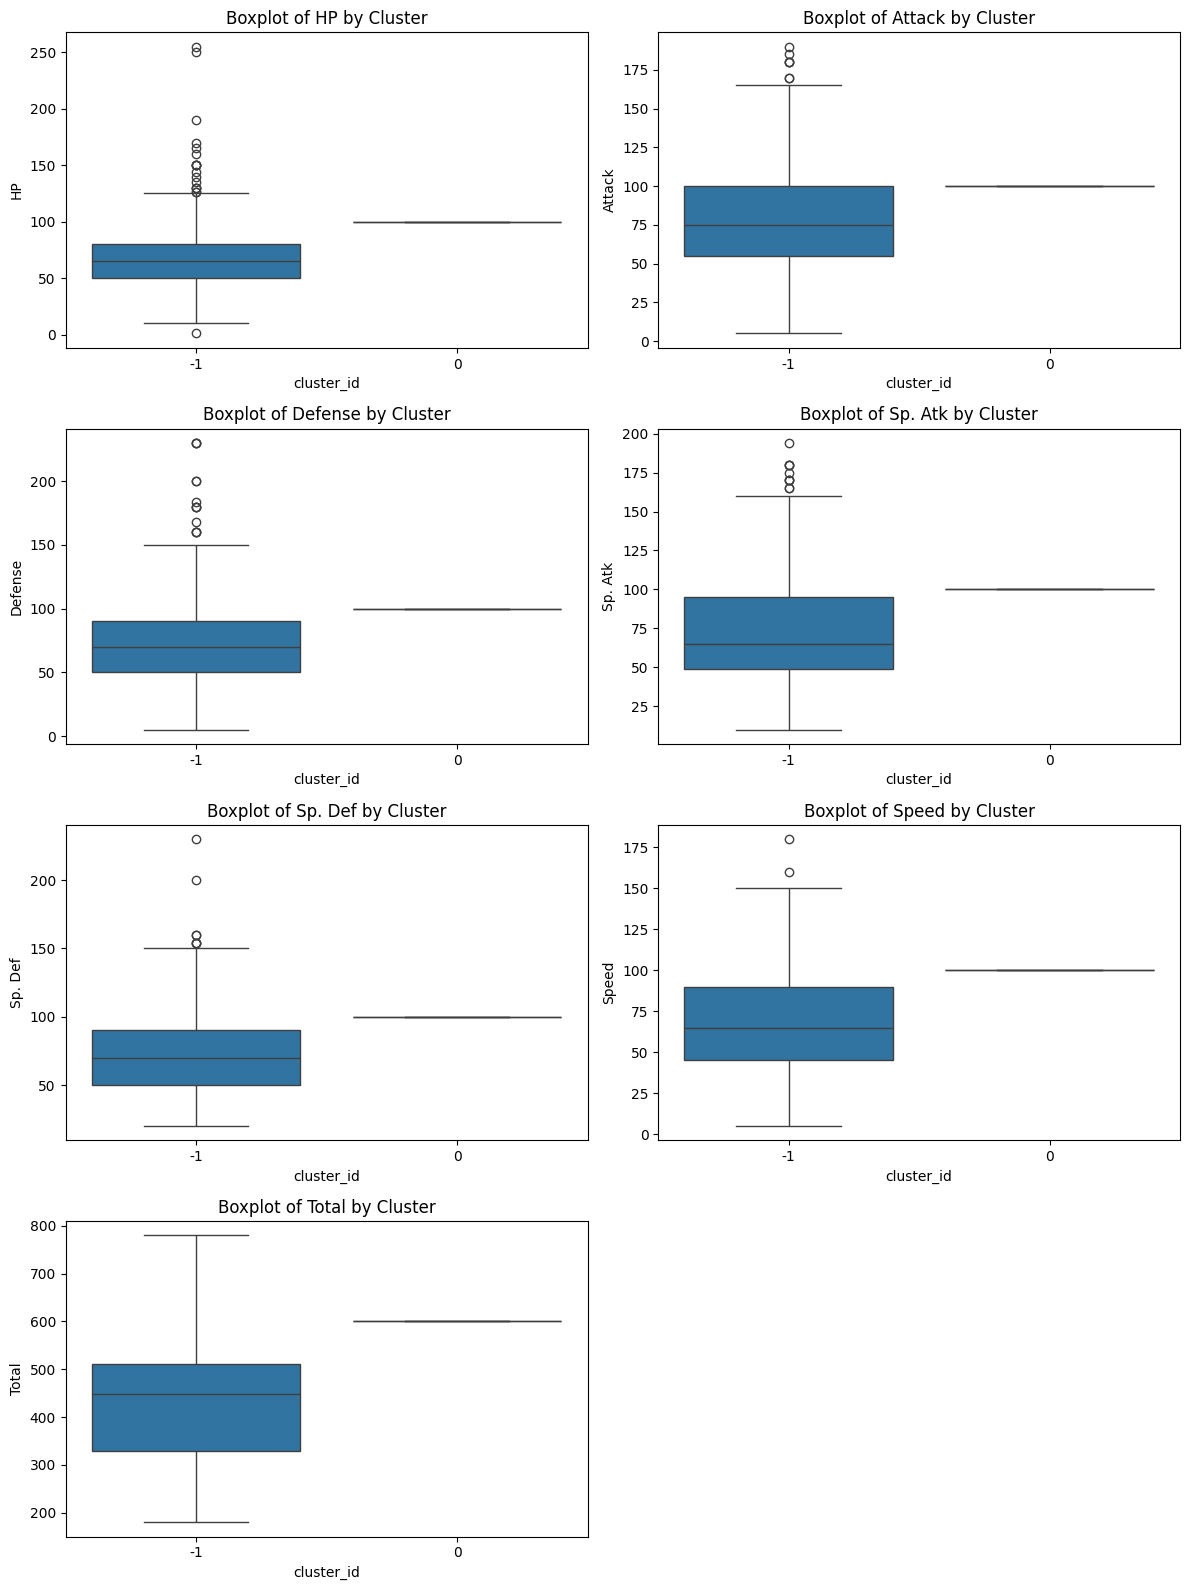

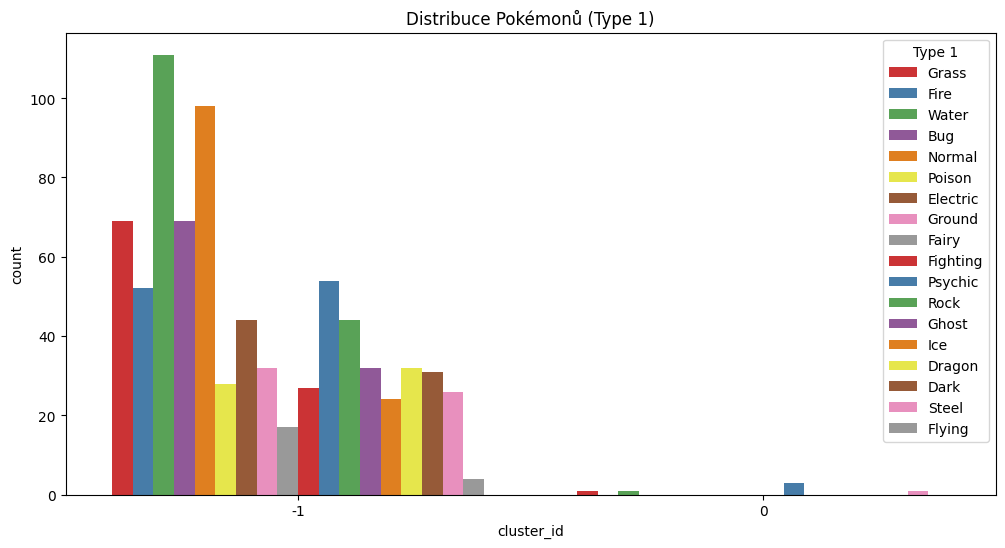

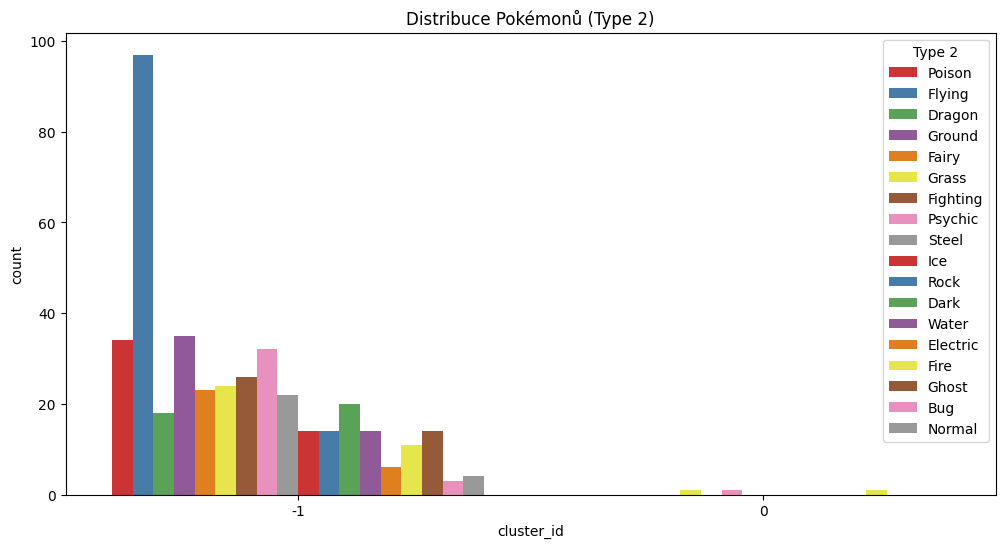

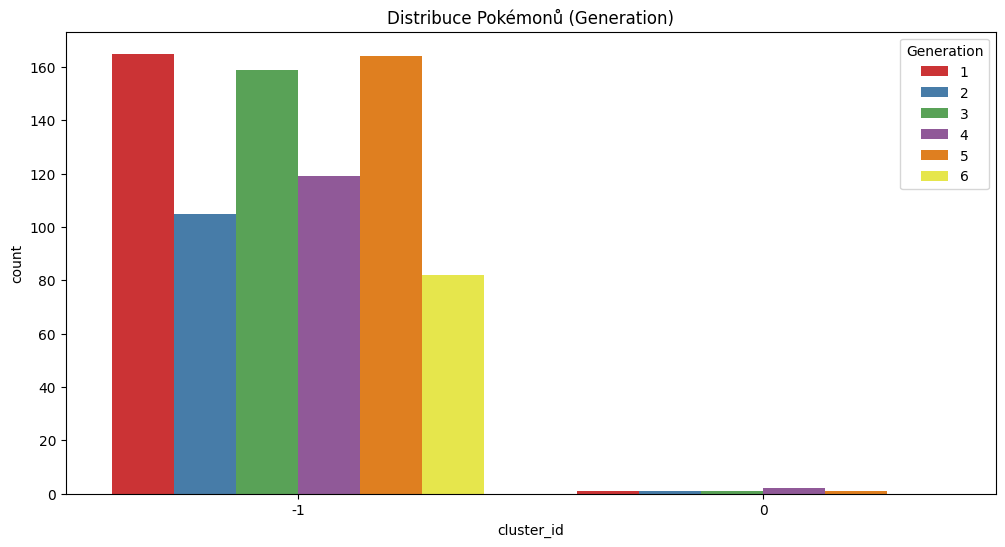

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=6)
dbscan.fit(df_dbscan)
df['cluster_id'] = dbscan.labels_

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cluster_id')
plt.title('DBSCAN')
plt.show()

attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Total']
num_attributes = len(attributes)
num_rows = (num_attributes + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

axes = axes.flatten()

for i, attribute in enumerate(attributes):
    if attribute in df.columns:
        sns.boxplot(x='cluster_id', y=attribute, data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot of {attribute} by Cluster')
    else:
        print(f"Warning: Column '{attribute}' not found in X_test. Skipping boxplot.")

if num_attributes % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

attributes = ['Type 1', 'Type 2','Generation']

for atr in attributes:
  plt.figure(figsize=(12, 6))
  sns.countplot(data=df, x='cluster_id', hue=atr, palette='Set1')
  plt.title(f'Distribuce Pokémonů ({atr})')
  plt.show()

Pro zvolený dataset není vhodné použít DBSCAN. I přes hledání nejlepších parametrů se nepodařilo najít přijatelný a hlavně vypovídající výsledek.

Algoritmus DBSCAN přiřadil všem datům shluk s číslem -1. To v DBSCAN algoritmu znamená, že algoritmus označil skoro všechny data jako šum.

# 4. Shlukování (Guassian Mixture)


Optimal Number of Components: 5


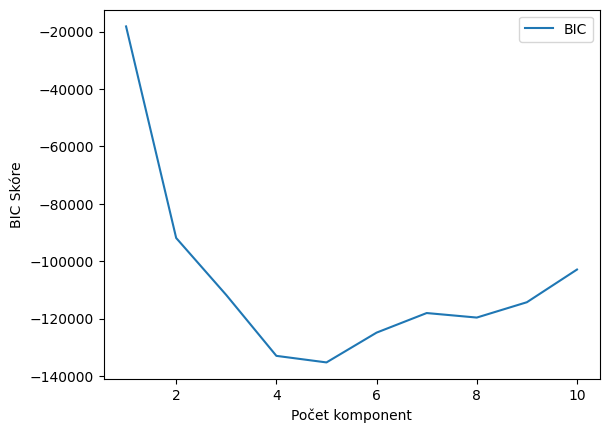

In [ ]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_scaled)
          for n in n_components]

optimal_n_components = n_components[np.argmin([m.bic(df_scaled) for m in models])]
print("Optimal Number of Components:", optimal_n_components)

plt.plot(n_components, [m.bic(df_scaled) for m in models], label='BIC')
plt.xlabel('Počet komponent')
plt.ylabel('BIC Skóre')
plt.legend()
plt.show()

Pro Gaussian Mixture bylo vyzkoušeno jak df_scaled tak df_gauss (vybrané atributy na základě cílové proměnné).

Výsledky jsou následující:

df_scaled - 10 shluků

df_gauss - 5 shluků

In [ ]:
optimal_n_components = 5

gmm = GaussianMixture(n_components=optimal_n_components, random_state=42)
gmm.fit(df_scaled)

cluster_labels = gmm.predict(df_scaled)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

cluster_id
0    436
3    173
2     78
1     66
4     47
Name: count, dtype: int64


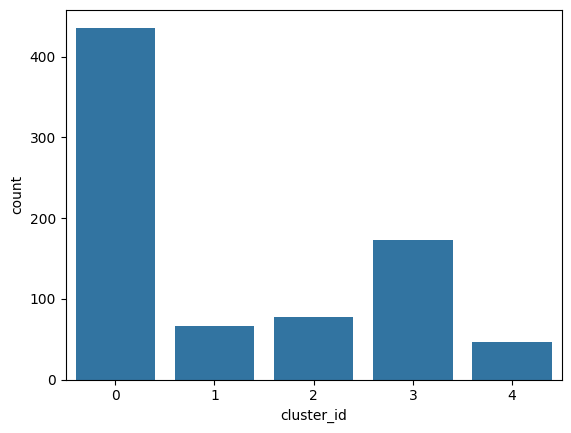

In [ ]:
df['cluster_id'] = cluster_labels
sns.countplot(data=df, x='cluster_id')

print(df['cluster_id'].value_counts())

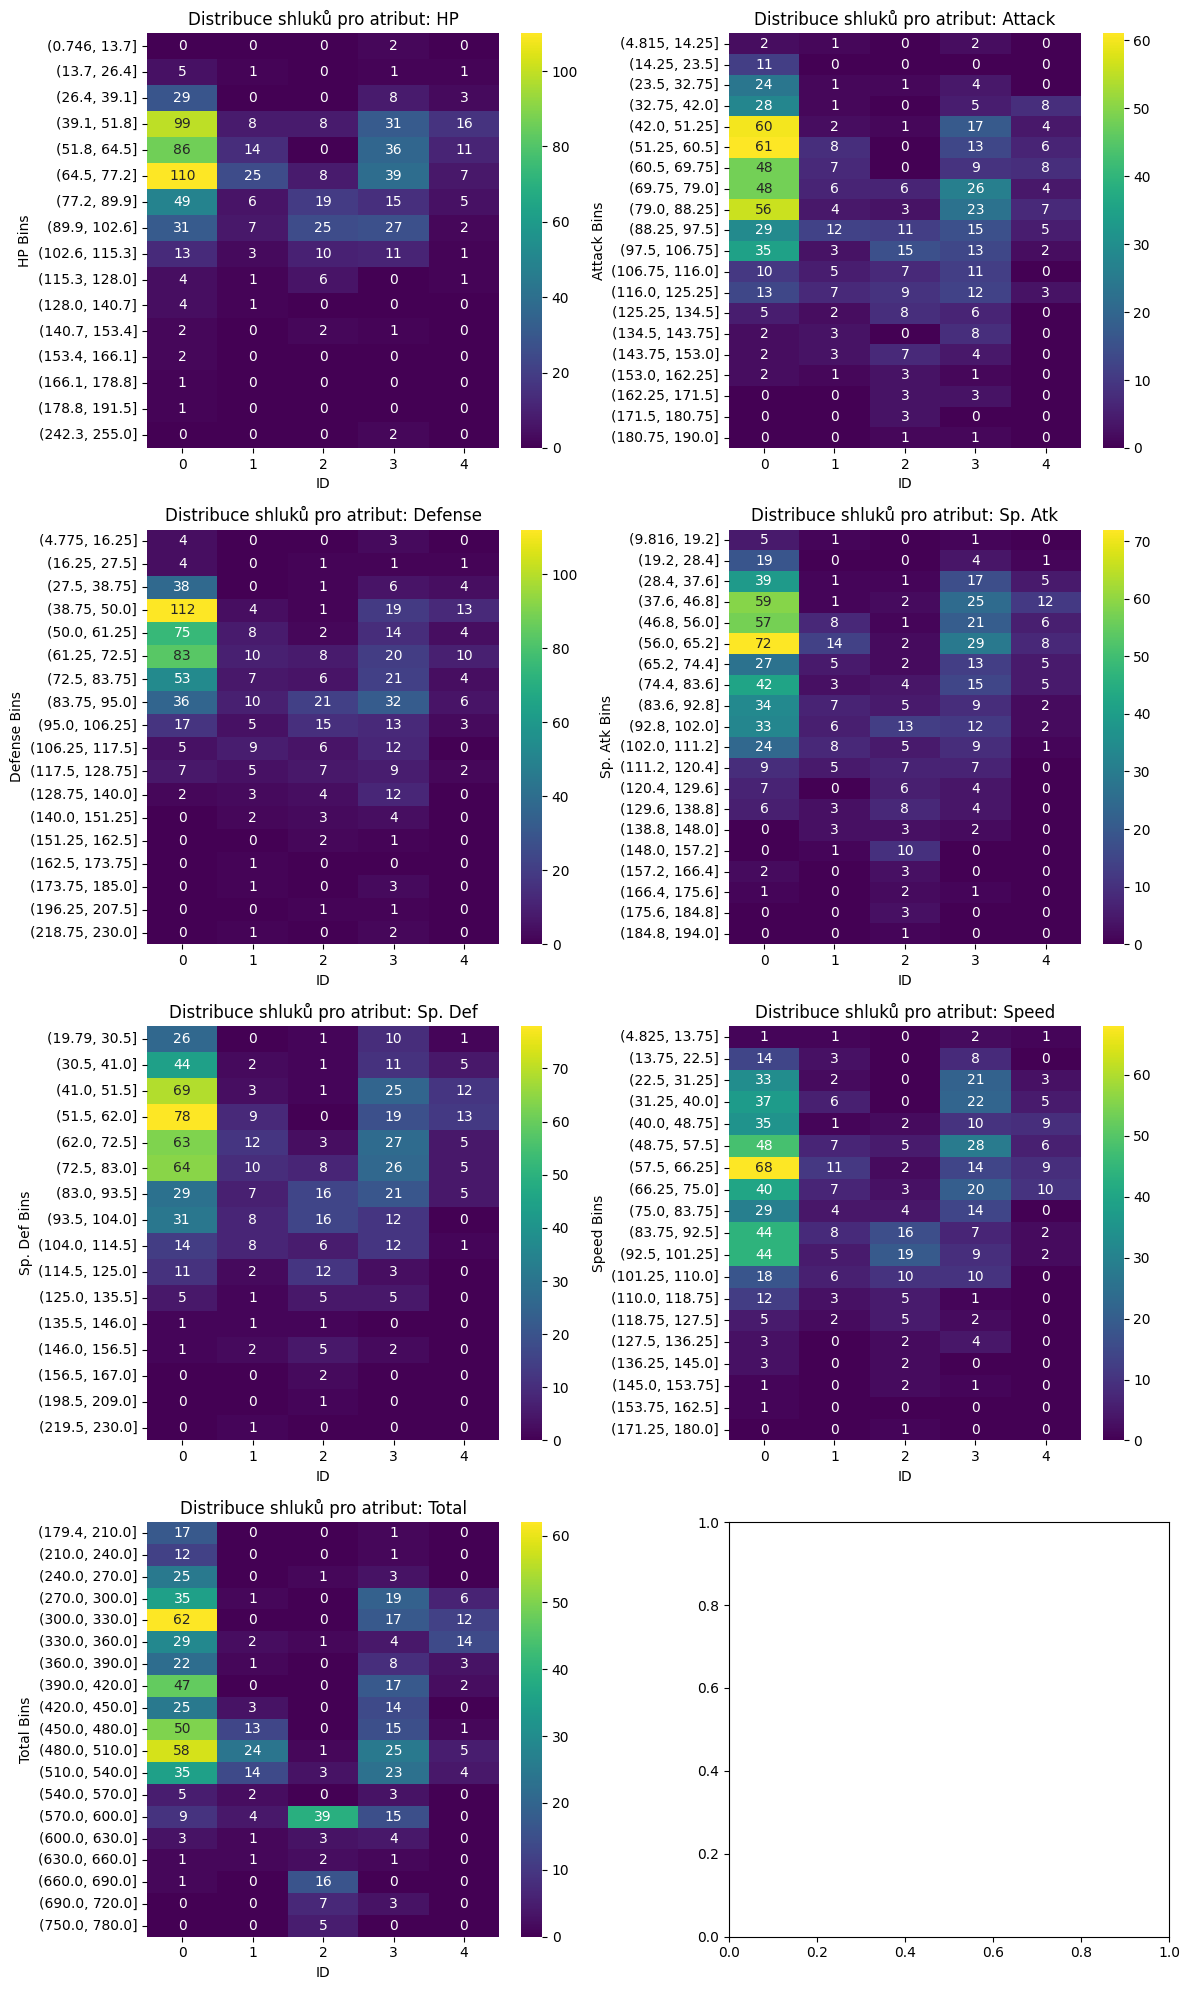

In [ ]:
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Total']

num_attributes = len(attributes)
num_columns = 2
num_rows = (num_attributes + 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 5 * num_rows))

for i, attribute in enumerate(attributes):
    row_index = i // num_columns
    col_index = i % num_columns

    df[f'{attribute}_bins'] = pd.cut(df[attribute], bins=20)

    cross_tab = pd.crosstab(df[f'{attribute}_bins'], df['cluster_id'])

    ax = axes[row_index, col_index]
    sns.heatmap(cross_tab, cmap='viridis', annot=True, fmt='d', ax=ax)

    ax.set_title(f'Distribuce shluků pro atribut: {attribute}')
    ax.set_xlabel('ID')
    ax.set_ylabel(f'{attribute} Bins')

plt.tight_layout()
plt.show()

Z výše uvedené vizualizace distribuce shluků lze pozorovat určité zajímavé tendence (viz. atribut Total, Speed). Z toho vyplývá, že by Gaussian Mixture mohl být vhodný shlukovací algoritmus.

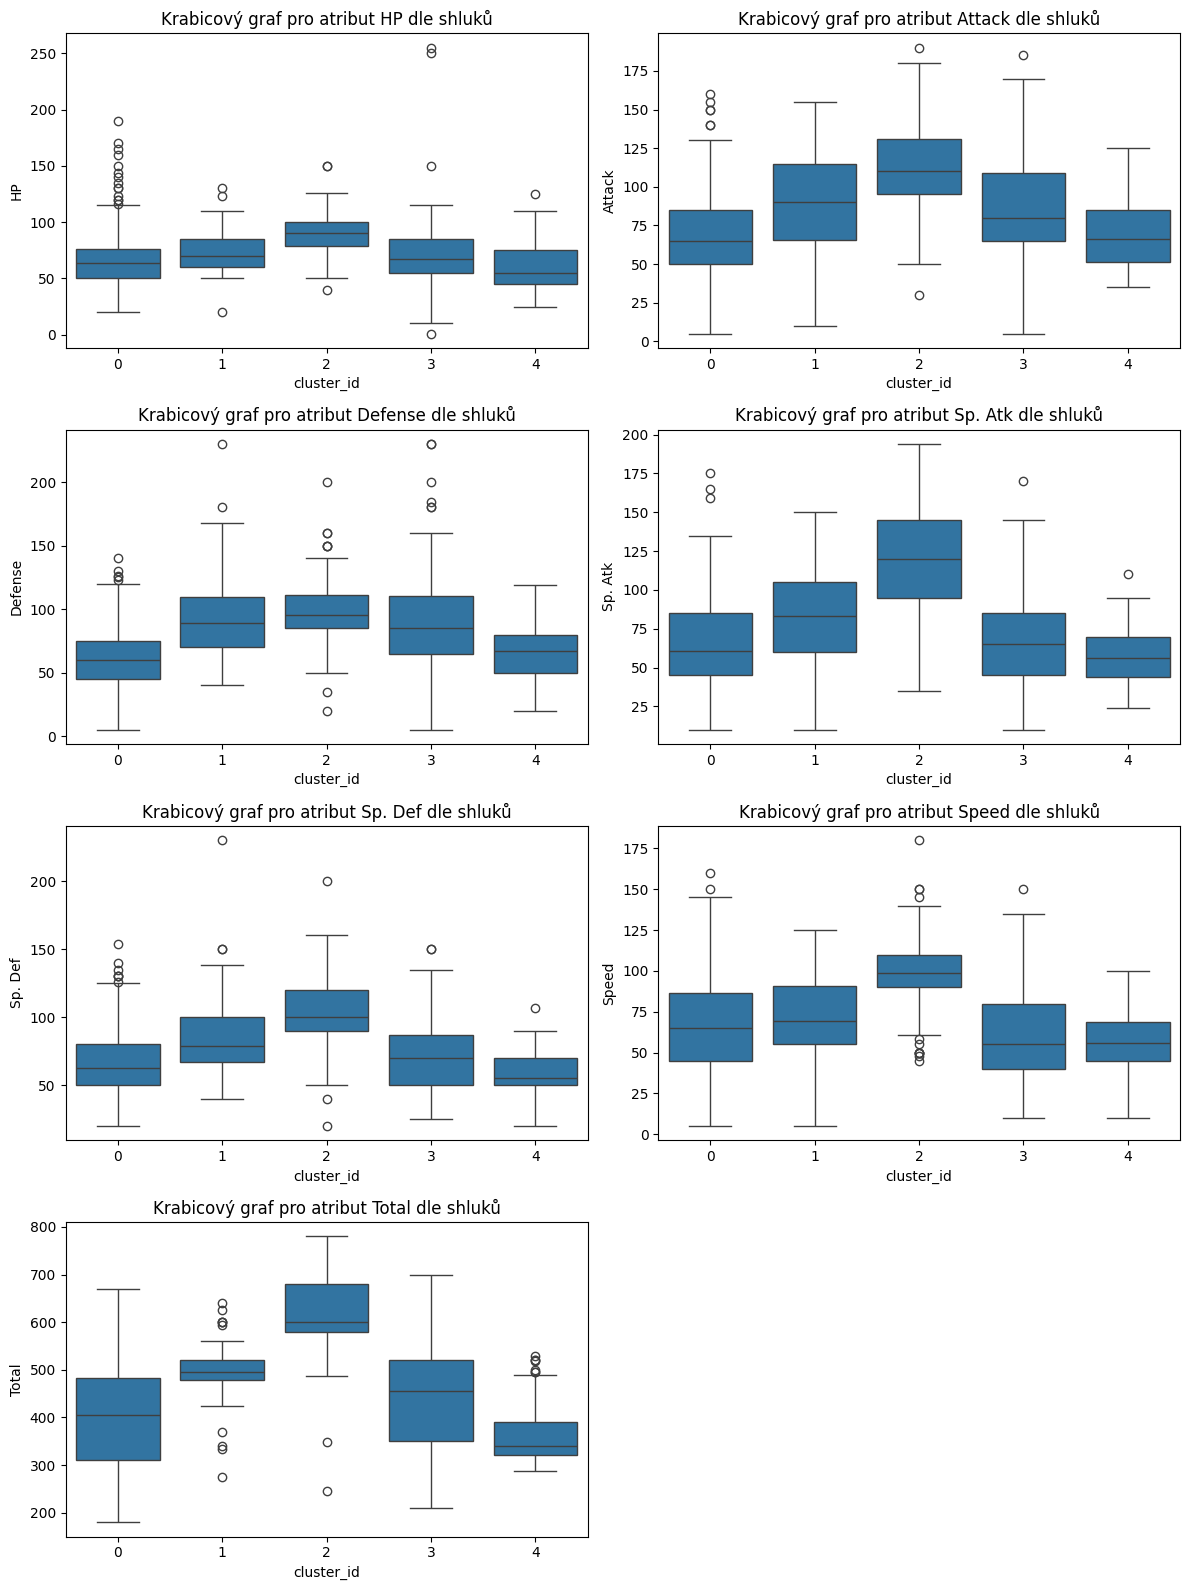

In [ ]:
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Total']
num_attributes = len(attributes)
num_rows = (num_attributes + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

axes = axes.flatten()

for i, attribute in enumerate(attributes):
    sns.boxplot(x='cluster_id', y=attribute, data=df, ax=axes[i])
    axes[i].set_title(f'Krabicový graf pro atribut {attribute} dle shluků')

if num_attributes % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

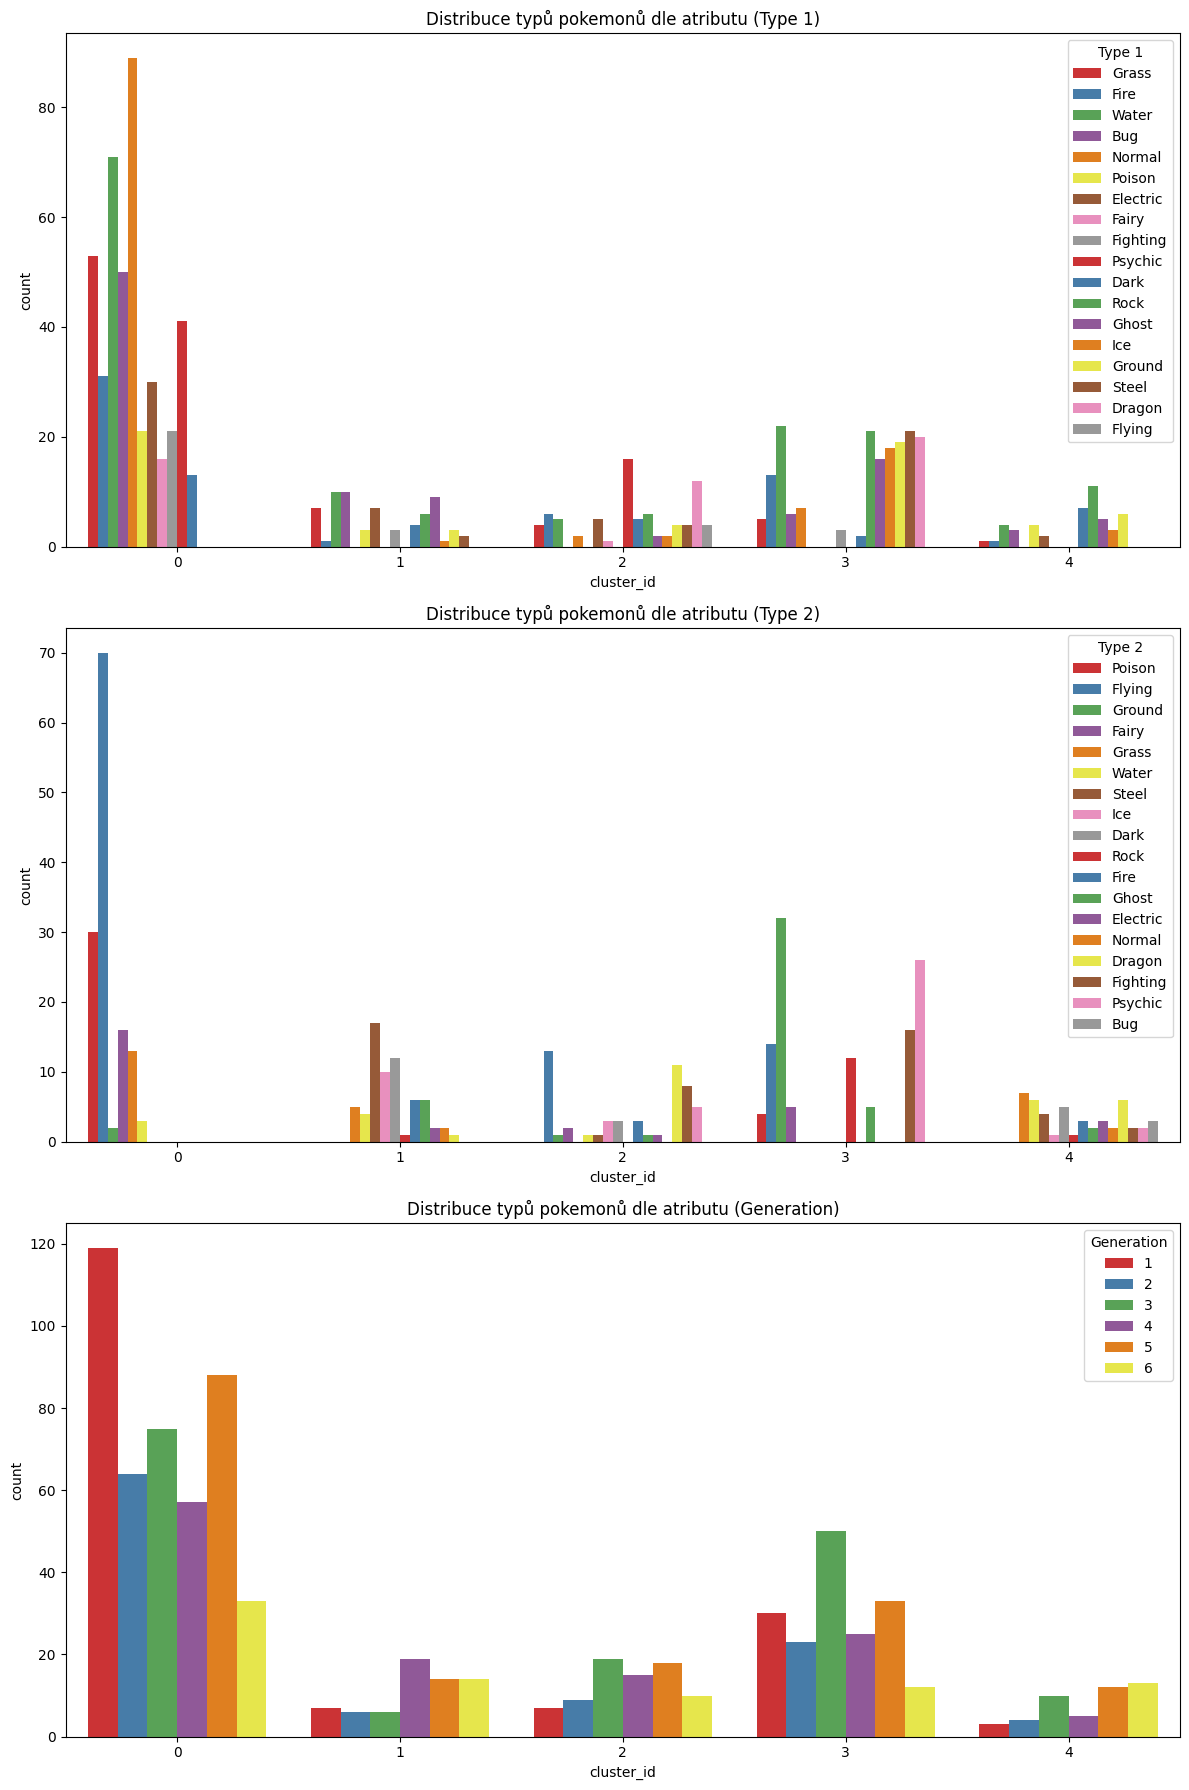

In [ ]:
attributes = ['Type 1', 'Type 2','Generation']
fig, axes = plt.subplots(len(attributes), 1, figsize=(12, 6 * len(attributes)))
for i, atr in enumerate(attributes):
  sns.countplot(data=df, x='cluster_id', hue=atr, ax=axes[i], palette='Set1')
  axes[i].set_title(f'Distribuce typů pokemonů dle atributu ({atr})')
plt.tight_layout()
plt.show()

### Popis (Krabicový graf)

#### HP
Shluk 0: Pokémoni v tomto shluku mají nejvyšší hodnoty atributu HP. Představují ideální volbu pro hráče, kteří preferují taktiku odolných tanků.
Shluk 1, 2 a 3: Zde nalezneme Pokémony s podobnou životní silou. To však neznamená, že jsou slabí. Mohou mít jiné výhody, jako je vysoký útok nebo rychlost. To si popíšeme níže.

#### Attack Sp. Atk
Shluk 2: Pokémoni v tomto shluku vynikají jak v normálních, tak ve speciálních útocích.
Ostatní shluky: Zde nalezneme Pokémony s vyváženými útočnými statistikami.

#### Defense a Sp. Def
Shluk 0: Pokémoni v tomto shluku jsou nejen odolní co do životní síly, ale také jsou dobří v obraně.
Shluk 2: Pokémoni v tomto shluku se mohou pochlubit vyšší speciální obranou, což naznačuje, že jsou odolní vůči magickým útokům.

Naopak co se týče 1 a 3 se vyskytují Pokémoni s vyšší klasickou obranou. To znamená, že jsou odolní vůči normálnímu poškození.

#### Speed
Shluk 2: Pokémoni v tomto shluku jsou skutečně rychlí a dokáží soupeře překvapit svou rychlostí.
Ostatní shluky: Zde nalezneme Pokémony spíše pomalejší, což je kompenzováno jejich vysokou životní silou nebo útokem.

#### Total: Kdo je tím nejlepším Pokémonem?
Shluk 2: Pokémoni v tomto shluku mají nejvyšší celkový součet, což znamená, že jsou velmi vyvážení a dokáží se vypořádat s různými typy soupeřů.
Ostatní shluky: Pokémoni v ostatních shlucích mají celkový součet nižší, což naznačuje, že jejich síla spočívá v konkrétních oblastech.

#### Závěr
Výsledek tohoto shlukování vyšel velmi podobně jako u Agglomerativního shlukování.

### Popis (Kategoriální atributy)

Obecně lze říct, že atributy "Type 1" ani "Type 2" neměly na shlukování vliv, protože nebyly zahrnuty jako zajímavé atributy. Také lze pozorovat trend, že určité typy jsou daleko víc zastoupené než jiné. Například "Flying" Pokémonů je daleko víc než "Water" Pokémonů.

Co se týče atributu "Generation", tak lze pozorvat celkem rovnoměrné rozdělení v jednotlivých shlucích. Shluk 0 je jediná výjimka, protože má obecně přiřazeno více Pokémonů, což může zkreslovat.

# Závěrčná konstatování a odůvodnění zvolení algoritmů

## Dataset a pre-processing
Dataset Pokémonů je velmi dobře připravený, což umožnilo jeho přímé použití bez nutnosti výrazného upravování. Hodnoty jednotlivých atributů byly v normálním rozdělení, takže bylo nutné provést škálování dat a dále byl proveden One-Hot Encoding pro kategorické atributy.

## Algoritmy
K-Means, Gaussian Mixture, Agglomerative Clustering vyšly velmi podobně, konkretnější rozdíly / zajímavosti jsou zmíněny v popiscích jednotlivých algoritmů.

Dané algoritmy byly zvoleny protože:

### Agglomerative Clustering
Nevyžaduje předem stanovený počet shluků.
Umožňuje identifikovat různé úrovně podobnosti mezi Pokémony.
Ideální pro nelineární dataset. Výpočetně náročné, zejména pro velké datové sady, což v tomto případě nevadilo, protože dataset je velmi malý.
Citlivé na volbu metrik vzdálenosti.

### K-Means Clustering
Jednoduchý a rychlý algoritmus.
Dobře funguje pro velké i malé datové sady.
Snadná interpretace výsledků.

Vyžaduje předem stanovený počet shluků, který lze určit například interní validační metrikou.
Citlivý na počáteční volbu centroidů.
Předpokládá sférické clustery.

### Gaussian Mixture
Flexibilní model, který může zachytit jiné vlastnosti datasetu.
Umožňuje měření pravděpodobnosti, že daný Pokémon patří do konkrétního shluku.
Dobře funguje pro datové sady s překrývajícími se clustery.
Výpočetně náročnější než K-Means.
Může být citlivý na inicializaci parametrů modelu, čemuž lze předejít použití validačních metod jako SSE nebo silhouette.

Obecně lze konstatovat, že výše zmíněné algoritmy byly vhodné pro tento dataset. Jediný DBSCAN, i přes úplné prohledávání parametrů, nešel použít.